# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell
from include.config import CleaningConfig, PlottingConfig, NotebookConfig
from include.counting import get_count, get_percentage
from include.plotting import get_plot, display_side_by_side
from include.likertScalePlot import likert_scale
from include.textCleaning import wordcloud

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 
InteractiveShell.ast_node_interactivity = "all" 

This text is used to hide the code cell when exported in html

In [3]:
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

# Load dataset
To find the total number of participants, we took all submissions and then removed those from people who were outside the country (see question 1) and those from people who had not completed the first ten questions (i.e. those people who did not complete the first page of the survey).

In [5]:
df =  pd.read_csv('./2017/de/data/cleaned_data.csv')

In [6]:
print('The total number of particants in this study: {}'.format(len(df)))

The total number of particants in this study: 325


# Section 1. Social demographics
In this section, we determine some information about the demographics of the respondents: language, gender, pay, educational level, age.

## Language
This survey offered the possibility to choose in which language the questions were displayed. The participants had the choice between German and English. 70% of the participants chose to fill the survey in German.

In [7]:
v_to_count, filename  = get_count(df, ['startlanguage. Start language'], "one choice", "../survey_creation/2017/de/listAnswers/languages.csv", "False", "./2017/de/output/")

In [8]:
perc_to_count = get_percentage(v_to_count, filename)

In [9]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Start language                   
de-informal       228        70.0
en                 97        30.0

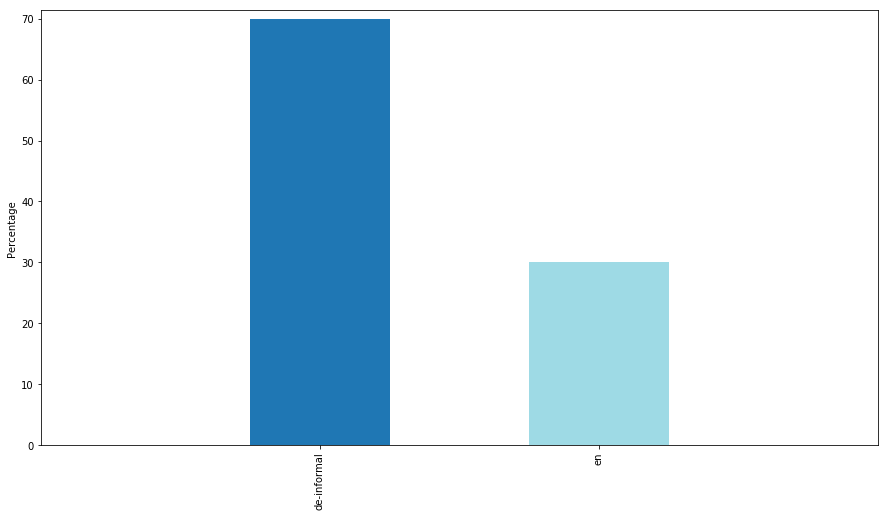

In [10]:
_ = get_plot(perc_to_count, "one choice")

## Country of work
The data was cleaned to remove all participants that were not working in Germany.

### In which country do you work?

In [11]:
v_to_count, filename  = get_count(df, ['socio1. In which country do you work?'], "one choice", "./../survey_creation/2017/de/listAnswers/countries.csv", "False", "./2017/de/output/")

In [12]:
perc_to_count = get_percentage(v_to_count, filename)

In [13]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
In which country do you work?                   
Germany                          325       100.0

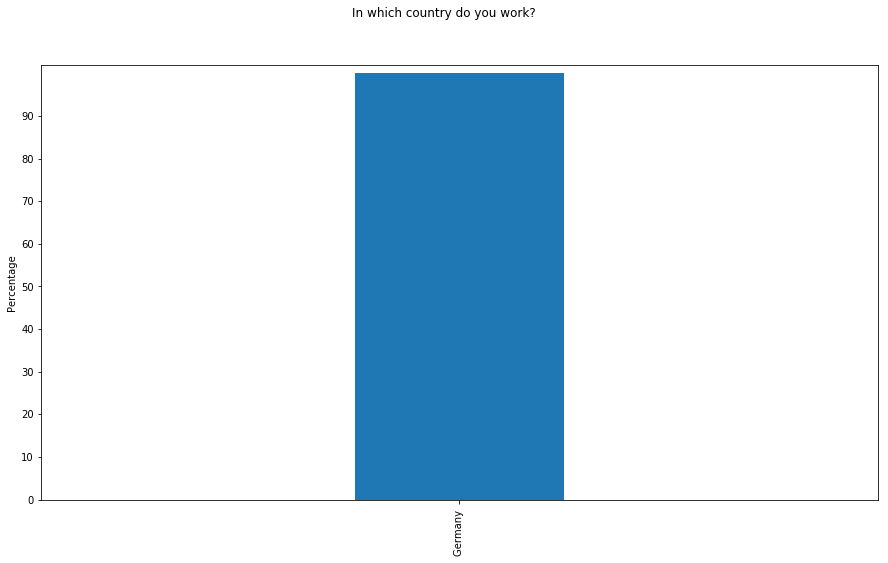

In [14]:
_ = get_plot(perc_to_count, "one choice")

## Qualifications
The highest proportion of RSEs hold a *doctorate* (48%) as their highest qualification but only by a margin when compared to *master degree* (43%). The rest of the participants are splitted between *undergraduate degree* (5%), *Other* (2%) and *final secondary-school examinations, general qualification for university entrance* (2%). 

Most RSEs derive from a background in *Physics and Astronomy* (26%). Then the three mains background are *Computer Science* (17%), *Biological Sciences* (11%) and *Other* (11%). There is a significant reduction in numbers in the next most popular background *Geography & Environmental Sciences* (7%).

### Education level

In [15]:
v_to_count, filename  = get_count(df, ['edu1. What is the highest qualification you have obtained?'], "one choice", "./../survey_creation/2017/de/listAnswers/education_de.csv", "False", "./2017/de/output/")

In [16]:
perc_to_count = get_percentage(v_to_count, filename)

In [17]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What is the highest qualification you have obta...                   
Doctorate                                             157        48.0
Master degree                                         140        43.0
Undergraduate degree                                   15         5.0
Other                                                   7         2.0
Final secondary-school examinations, general qu...      5         2.0
GSCEs                                                   1         0.0

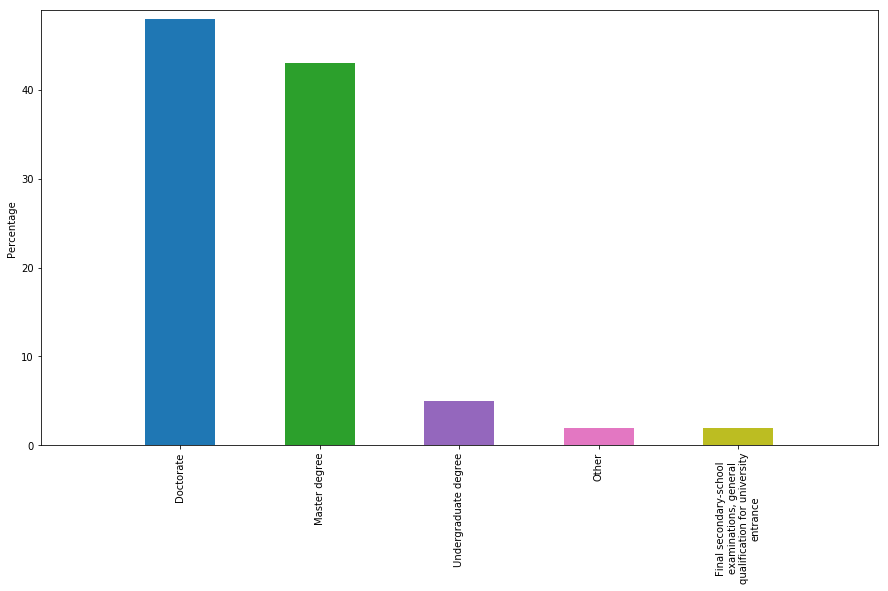

In [18]:
_ = get_plot(perc_to_count, "one choice")

### Field of qualification 

In [19]:
v_to_count, filename  = get_count(df, ['edu2. In which subject is your highest academic qualification?'], "one choice", "./../survey_creation/2017/de/listAnswers/academic_field.csv", "False", "./2017/de/output/")

In [20]:
perc_to_count = get_percentage(v_to_count, filename)

In [21]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
In which subject is your highest academic quali...                   
Physics and Astronomy                                  83        26.0
Computer Science                                       54        17.0
Biological Sciences                                    37        11.0
Other                                                  36        11.0
Geography & Environmental Sciences                     23         7.0
Mathematics                                            17         5.0
Electrical & Electronic Engineering                     8         2.0
Psychology                                              8         2.0
Geology                                                 6         2.0
Chemistry                                               6         2.0
Mechanical Engineering                                  5         2.0
Chemical Engineering                                    4         1.0
German                                                  3         1.0
Librarianship & Information Management                  3         1.0
History                                                 3         1.0
Agriculture & Forestry                                  3         1.0
Classics & Ancient History                              3         1.0
General Engineering                                     3         1.0
Sociology                                               2         1.0
Aeronautical & Manufacturing Engineering                2         1.0
History of Art, Architecture & Design                   2         1.0
Communication & Media Studies                           2         1.0
Civil Engineering                                       2         1.0
Philosophy                                              2         1.0
Pharmacology & Pharmacy                                 1         0.0
Politics                                                1         0.0
Linguistics                                             1         0.0
Town & Country Planning and Landscape Design            1         0.0
Economics                                               1         0.0
English                                                 1         0.0
Medicine                                                1         0.0
Anatomy & Physiology                                    1         0.0

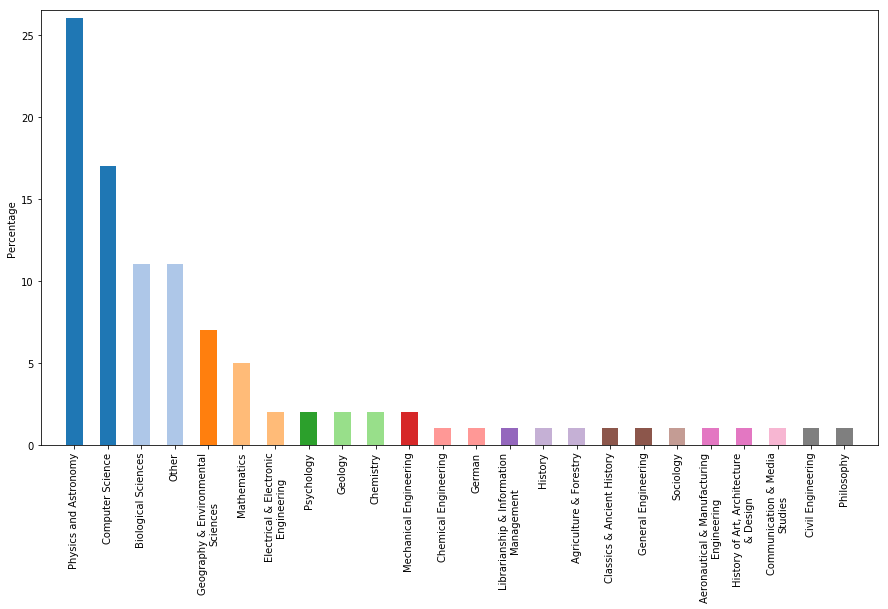

In [22]:
_ = get_plot(perc_to_count, "one choice")

## Gender
Their is a clear gender imbalance in the RSE community in Germany. It is predominately *male* (83%). Only 13% of the participants describe their gender as *female*, while 4% *prefer not to say*. 

In [23]:
v_to_count, filename  = get_count(df, ['socio2. Please select your gender'], "one choice", "./../survey_creation/2017/de/listAnswers/gender.csv", "False", "./2017/de/output/")

In [24]:
perc_to_count = get_percentage(v_to_count, filename)

In [25]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select your gender                   
Male                         219        83.0
Female                        34        13.0
Prefer not to say             10         4.0
NaN                           62         NaN

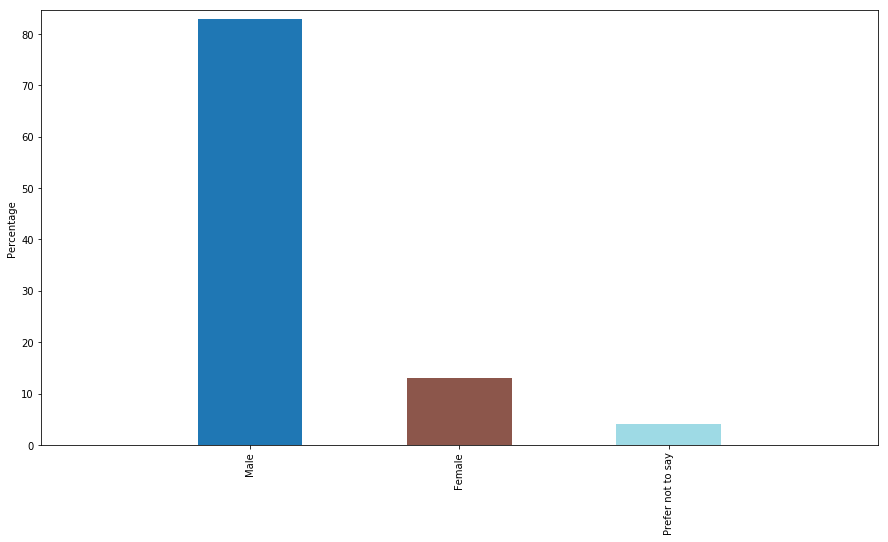

In [26]:
_ = get_plot(perc_to_count, "one choice")

## Age
The majority of RSEs fall within the *25 to 34 years* (45%), and the next more important age range is *35 to 44 years* (39%). The representation of older or younger range is marginal compared to these two groups (17% in total, split in three age ranges).

In [27]:
v_to_count, filename  = get_count(df, ['socio3. Please select your age'], "one choice", "./../survey_creation/2017/de/listAnswers/age.csv", "True", "./2017/de/output/")

In [28]:
perc_to_count = get_percentage(v_to_count, filename)

In [29]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select your age                   
18 to 24 years              5         2.0
25 to 34 years            118        45.0
35 to 44 years            101        39.0
45 to 54 years             23         9.0
55 to 64 years             15         6.0
NaN                        63         NaN

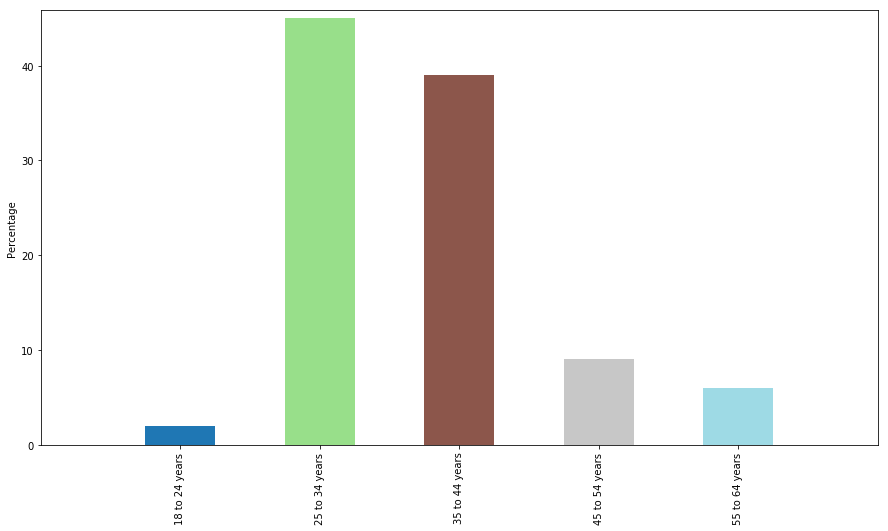

In [30]:
_ = get_plot(perc_to_count, "one choice")

## Salary

We asked the participants to give us the range of salary they are paid. The most common salary in Germany for the participants is less than 27.499 euros (19%). However, almost half of the participants (42%), are concentred within three ranges of salary, spanning from 44.000 euros to 65.999 euros: 10% for the range between 44.000 ad 49.999 euros, 16% between 50.000 and 54.999 euros and 16% between 55.000 and 65.999 euros.

### Salary

In [31]:
v_to_count, filename  = get_count(df, ['socio4. Please select the range of your salary'], "one choice", "./../survey_creation/2017/de/listAnswers/salary.csv", "True", "./2017/de/output/")

In [32]:
perc_to_count = get_percentage(v_to_count, filename)

In [33]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select the range of your salary                   
Less than 27.499 EUR                       50        19.0
Between 27.500 and 32.999 EUR              19         7.0
Between 33.000 and 38.499 EUR              14         5.0
Between 38.500 and 43.999 EUR              16         6.0
Between 44.000 and 49.999 EUR              25        10.0
Between 50.000 and 54.999 EUR              41        16.0
Between 55.000 and 65.999 EUR              40        16.0
Between 66.000 and 76.999 EUR              14         5.0
Between 77.000 and 109.999 EUR             12         5.0
Prefer not to say                          26        10.0
NaN                                        68         NaN

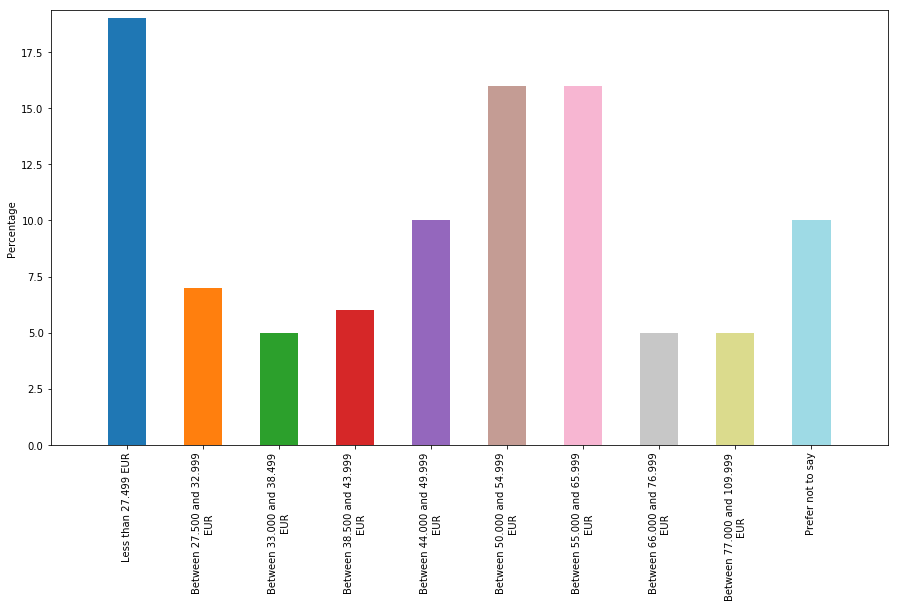

In [34]:
_ = get_plot(perc_to_count, "one choice")

### collective bargaining agreement

In [35]:
v_to_count, filename  = get_count(df, ['socio10de. Please select your renumeration group according to your collective bargaining agreement'], "one choice", "./../survey_creation/2017/de/listAnswers/entgeltgruppe_de.csv", "True", "./2017/de/output/")

In [36]:
perc_to_count = get_percentage(v_to_count, filename)

In [37]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select your renumeration group according...                   
E1-E7                                                   7         3.0
E8                                                      1         0.0
E10                                                     6         2.0
E11                                                     9         4.0
E12                                                     6         2.0
E13                                                   141        56.0
E14                                                    37        15.0
E15                                                     5         2.0
Other                                                  40        16.0
NaN                                                    73         NaN

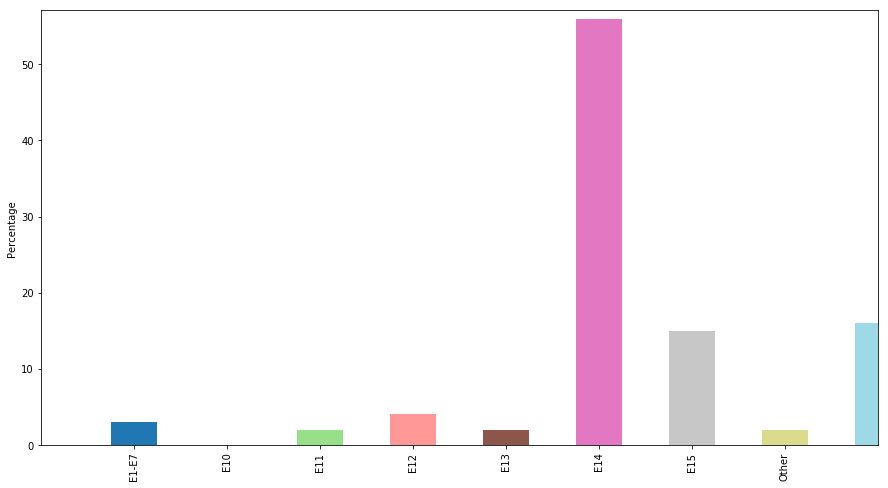

In [38]:
_ = get_plot(perc_to_count, "one choice")

## Professional qualifications
The RSE in general do not have personal qualification, among the 375 participants, only 54 filled this question with a valuable information

### Do you hold any other professional degrees/qualifications? (Please enter each of them separated by a semicolon)

In [39]:
data = df['edu4. Do you hold any other professional qualifications?'].dropna()
data = [i.strip() for i in data if len(i.strip()) > 2 and i.strip().lower() not in ['dr.', 'msc', 'm.a.', 'bsc', 'b.sc.', 'nein', 'diplom', 'none', 'ba. sc.', 'ma. sc.']]
print('Number of participants that have a professional qualifications: {}'.format(len(data)))

Number of participants that have a professional qualifications: 54


In [40]:
skills = [z.strip()  for i in data for z in i.split(',') if len(z.strip()) > 2 and z.strip().lower() not in ['dr.', 'msc', 'm.a.', 'bsc', 'b.sc.', 'nein', 'diplom', 'none', 'ba. sc.', 'ma. sc.']]
print('There is {} propositions'.format(len(skills)))
for i in skills:
    print(i)

There is 57 propositions
Diplom (Physik)
Europan Master Linguistics
B.A Psychologie
Master Environmental Management
Master of Library and Information Science
Staatsexamen
Diplom in Mathematik
Habilitation
M.Sc. Mathematik
Diplom Sozialwirt
Zur zeit noch Student: Bachelor of Science Geoinformatik
Professorship
Teaching Diploma in Physics
qualifying me for teaching posts at upper secondary schools
Physics
B.Sc. Physik
B.Sc. Physics
M.Sc. Neuroscience
Habilitation
Dipl.-Inf.(FH)
Master/Bachelor in Molekulare Biotechnologie
Diplom Physik
Bachelor of Science
Yes (Computer Science)
Diplom Ingenieur Nachrichtentechnik/Informatik (FH)
Doktorarbeit in Biologie eingereicht
aber noch nicht verteidigt
Bachelor Geoinformatik
Bachelor of Science Geographie
Diplom (FH) Maschinenbau
Toolmaker certificate (Germany)
Berufsausbildung tech. Assisent für Medien (erworben vor dem Studium)
French Telecommunication Engineering School
Elektroinatalateur
Elektronik-Techniker
Diplom-Volkswirt
Medizinische Physik

In [41]:
 wc = wordcloud(df, ['edu4. Do you hold any other professional qualifications?'])

(-0.5, 1499.5, 799.5, -0.5)

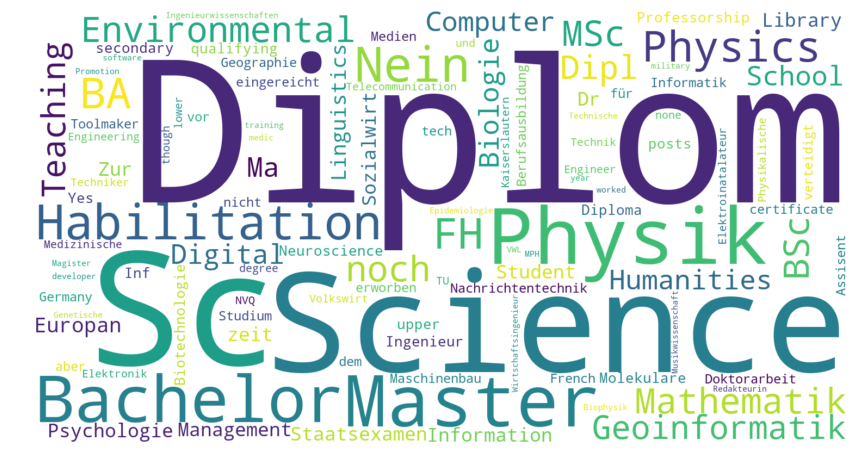

In [42]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Questions about coding

In this section we investigate the relationship between RSEs and the code they develop.

As expected, the vast majority of RSEs (96%) write code. They are in vast majority writing code for other people, only 8% of them write code for themselves, and 71% for 2 or more people

Also, more than the half of them (54%) are involved in software projects that does not necessarily involve coding on their behalf.
However, despite the majority of them writing code, only 47% consider themselves as *professional software developer*. This is a low number when we consider the average time of developing software (10 years) and that they are mainly developing software for others.

Unsurprisingly, RSEs spend the majority of their time coding. The only other major call on their time is "research", so it would appear that their job title accurately describes their work. "Teaching" is the aspect of work with the least call on RSEs time: 54% of RSEs reported that they spent no time teaching.

### Do you write code as part of your job?

In [43]:
v_to_count, filename  = get_count(df, ['rse1. Do you write code as part of your job?', 'rse4de. Are you involved and responsible for software projects with non-coding activities as part of your job, e.g. do you lead a software projects, design software architectures or UIs, testing, write documentation?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [44]:
perc_to_count = get_percentage(v_to_count, filename)

In [45]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
rse1. Do you write code as part of your job?                311          14   
rse4de. Are you involved and responsible for so...          176         149   

                                                    Yes [Percentage]  \
rse1. Do you write code as part of your job?                    96.0   
rse4de. Are you involved and responsible for so...              54.0   

                                                    No [Percentage]  
rse1. Do you write code as part of your job?                    4.0  
rse4de. Are you involved and responsible for so...             46.0

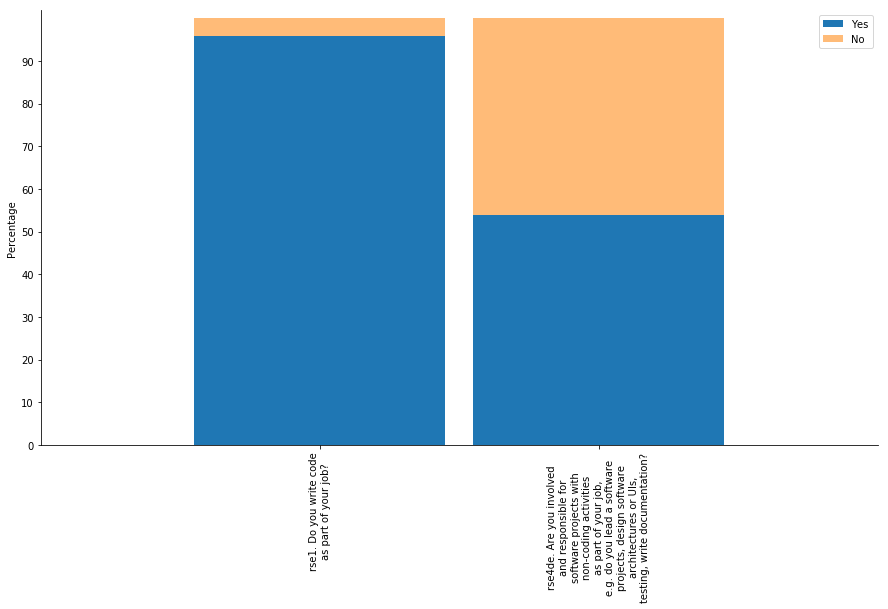

In [46]:
_ = get_plot(perc_to_count, "y/n/na")

### Who uses the code that you write?

In [47]:
v_to_count, filename  = get_count(df, ['rse3[SQ001]. Who uses the code that you write? []'], "likert", "./../survey_creation/2017/de/listAnswers/likert_usage_5.csv", "True", "./2017/de/output/")

In [48]:
perc_to_count = get_percentage(v_to_count, filename)

In [49]:
display_side_by_side(v_to_count,perc_to_count)

0 - Mostly me [Count]  1 [Count]  \
Who uses the code that you write? []                     27         68   

                                      2 [Count]  3 [Count]  4 [Count]  \
Who uses the code that you write? []         73         52         54   

                                      5 - Mostly other people [Count]  \
Who uses the code that you write? []                               51   

                                      0 - Mostly me [Percentage]  \
Who uses the code that you write? []                         8.0   

                                      1 [Percentage]  2 [Percentage]  \
Who uses the code that you write? []            21.0            22.0   

                                      3 [Percentage]  4 [Percentage]  \
Who uses the code that you write? []            16.0            17.0   

                                      5 - Mostly other people [Percentage]  
Who uses the code that you write? []                                  16.0

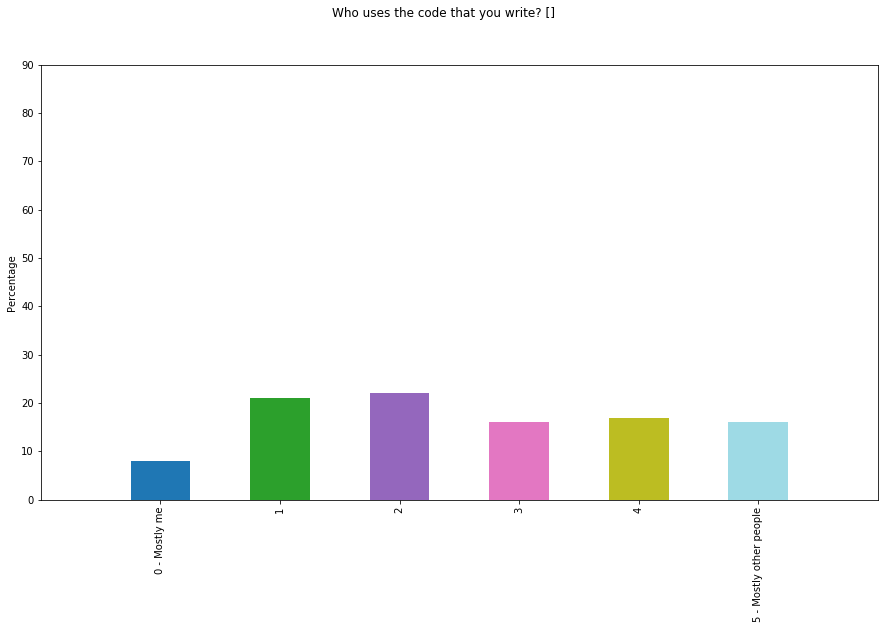

In [50]:
_ = get_plot(perc_to_count, "likert")

### Do you consider yourself a professional software developer?

In [51]:
v_to_count, filename  = get_count(df, ['soft2can. Do you consider yourself a professional software developer?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [52]:
perc_to_count = get_percentage(v_to_count, filename)

In [53]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you consider yourself a professional softwar...          139         186   

                                                    Yes [Percentage]  \
Do you consider yourself a professional softwar...              43.0   

                                                    No [Percentage]  
Do you consider yourself a professional softwar...             57.0

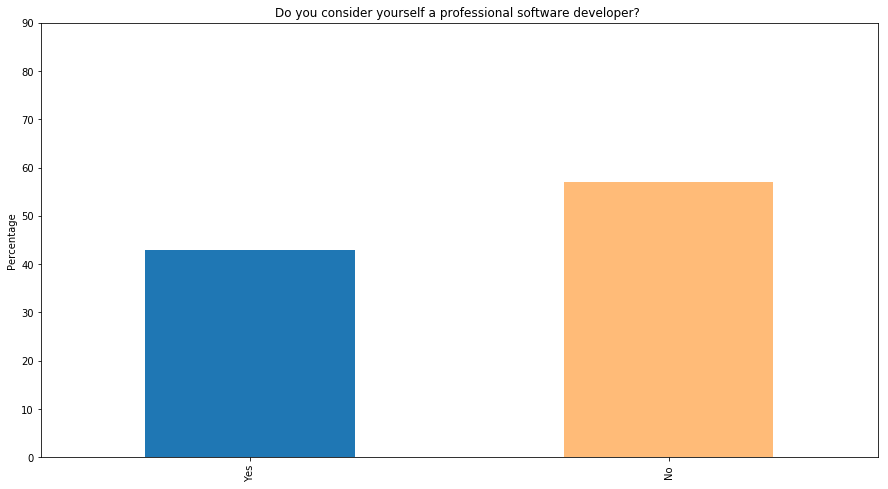

In [54]:
_ = get_plot(perc_to_count, "y/n/na")

### How many years of Software development experience do you have?

In [55]:
v_to_count, filename  = get_count(df, ['soft1can. How many years of Software development experience do you have?'], "freenumeric", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

       How many years of Software development experience do you have?
count                                         325.000000             
mean                                           10.940000             
std                                             8.517063             
min                                             0.000000             
25%                                             5.000000             
50%                                             8.000000             
75%                                            15.000000             
max                                            41.000000             


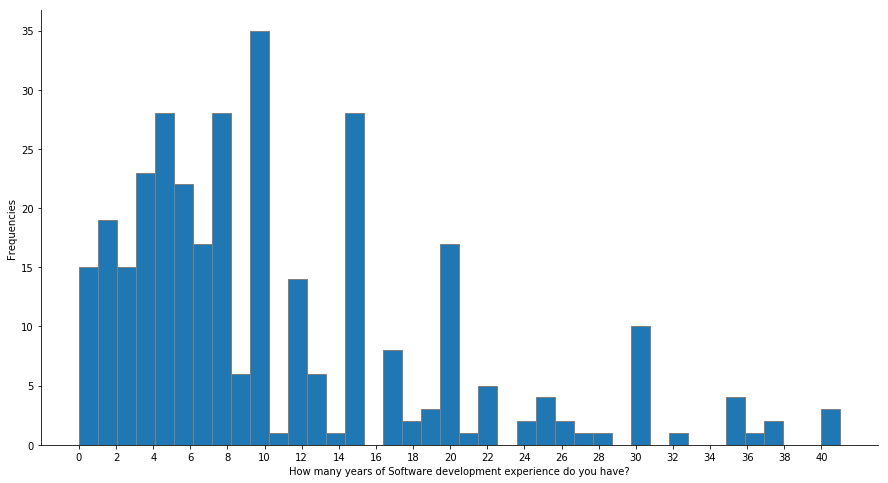

In [56]:
_ = get_plot(v_to_count, "freenumeric")

### In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)

In [57]:
v_to_count, filename  = get_count(df, ['likert0[time1can]. [In an average month, how much time do you spend on software development]', 'likert0[time2can]. [In an average month, how much time do you spend on Research]', 'likert0[time3can]. [In an average month, how much time do you spend on Management]', 'likert0[time4can]. [In an average month, how much time do you spend on Teaching]', 'likert0[time5can]. [In an average month, how much time do you spend on Other activities]'], "likert", "./../survey_creation/2017/de/listAnswers/likert_time_10.csv", "False", "./2017/de/output/")

In [58]:
display(v_to_count) 

﻿1 (None at all)      2  \
In an average month, how much time do you spend...               4.0   20.0   
In an average month, how much time do you spend...              36.0   53.0   
In an average month, how much time do you spend...              54.0  108.0   
In an average month, how much time do you spend...             174.0   91.0   
In an average month, how much time do you spend...              57.0  103.0   

                                                       3     4     5     6  \
In an average month, how much time do you spend...  62.0  41.0  34.0  45.0   
In an average month, how much time do you spend...  58.0  41.0  36.0  26.0   
In an average month, how much time do you spend...  67.0  30.0  25.0  12.0   
In an average month, how much time do you spend...  30.0  12.0   8.0   2.0   
In an average month, how much time do you spend...  72.0  34.0  34.0  13.0   

                                                       7     8     9  \
In an average month, how much time do you spend...  58.0  39.0  15.0   
In an average month, how much time do you spend...  23.0  23.0  16.0   
In an average month, how much time do you spend...  11.0  13.0   5.0   
In an average month, how much time do you spend...   3.0   5.0   NaN   
In an average month, how much time do you spend...   7.0   3.0   1.0   

                                                    10 (All my time)  
In an average month, how much time do you spend...               7.0  
In an average month, how much time do you spend...              13.0  
In an average month, how much time do you spend...               NaN  
In an average month, how much time do you spend...               NaN  
In an average month, how much time do you spend...               1.0

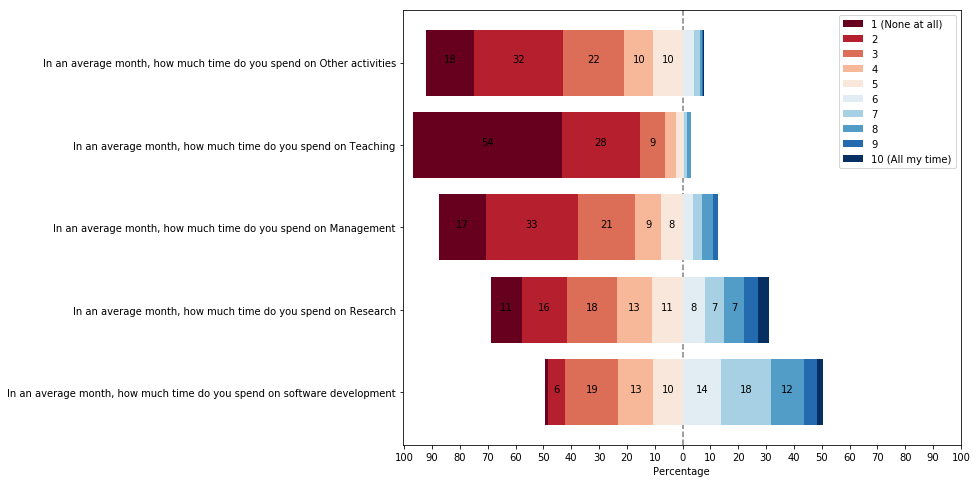

In [59]:
_ = get_plot(v_to_count, "likert")

# Questions about employment

30% of RSEs work within a university. However, in Germany they have research centers which are different. In total, these account for 58%, with a majority of RSEs working in the *Helmholtz Association of German Research Centres* and for the *Max Plancks Society* (both accounting for 25% of the total of participants).

At the question about the field where they work, the participants mainly answered *Computer Science*, followed by *Physics and Astronomy* and *Biological Sciences* (both 14%). These is the three main disciplines found in the question about education. 

### What type of organisation do you work for?

In [60]:
v_to_count, filename  = get_count(df, ['currentEmp1. What type of organisation do you work for?'], "one choice", "./../survey_creation/2017/de/listAnswers/type_organisation_de.csv", "False", "./2017/de/output/")

In [61]:
perc_to_count = get_percentage(v_to_count, filename)

In [62]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What type of organisation do you work for?                         
University                                           98        30.0
Helmholtz Association of German Research Centres     82        25.0
Max Planck Society                                   80        25.0
Leibniz Association                                  25         8.0
Other                                                24         7.0
Private Company                                       7         2.0
Government                                            6         2.0
Fraunhofer Society                                    2         1.0
University of Applied Sciences                        1         0.0

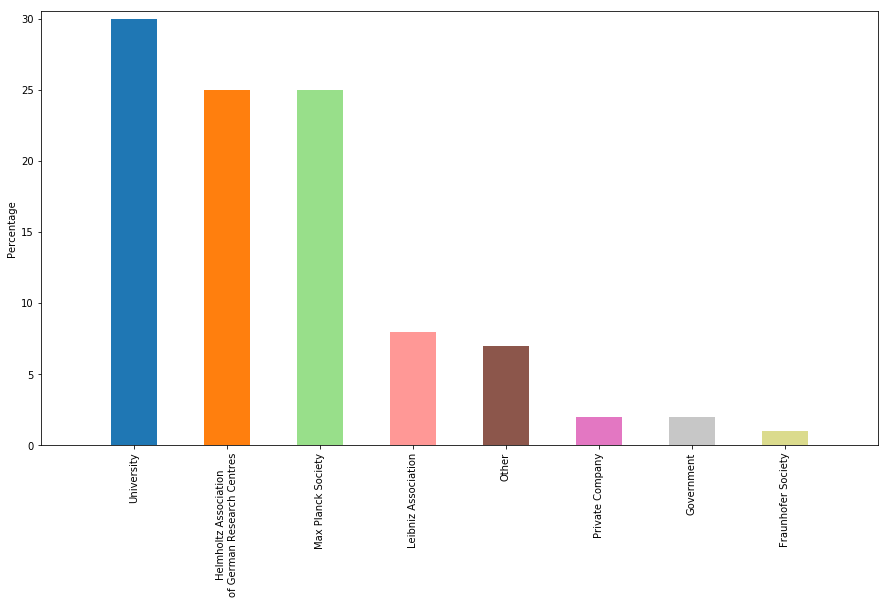

In [63]:
_ = get_plot(perc_to_count, "one choice")

### Which University do you work for?

In [64]:
v_to_count, filename  = get_count(df, ['currentEmp2. Which University do you work for?'], "one choice", "./../survey_creation/2017/de/listAnswers/universities_de.csv", "False", "./2017/de/output/")

In [65]:
perc_to_count = get_percentage(v_to_count, filename)

In [66]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which University do you work for?                        
Humboldt University of Berlin               9         9.0
University of Potsdam                       8         8.0
University of Würzburg                      8         8.0
University of Cologne                       6         6.0
Karlsruhe Institute of Technology           6         6.0
Free University of Berlin                   5         5.0
University of Göttingen                     5         5.0
University of Kiel                          5         5.0
TU Dresden                                  5         5.0
Technical University of Berlin              4         4.0
Other                                       4         4.0
University of Hamburg                       4         4.0
University of Münster                       3         3.0
Goethe University Frankfurt                 3         3.0
University of Freiburg                      2         2.0
University of Bonn                          2         2.0
University of Passau                        2         2.0
University of Konstanz                      2         2.0
University of Jena                          2         2.0
Ludwig Maximilian University of Munich      2         2.0
Leipzig University                          2         2.0
University of Kaiserslautern                1         1.0
Heidelberg University                       1         1.0
Technical University of Munich              1         1.0
University of Hanover                       1         1.0
University of Koblenz and Landau            1         1.0
University of Duisburg-Essen                1         1.0
FernUniversität Hagen                       1         1.0
University of Oldenburg                     1         1.0
University of Düsseldorf                    1         1.0
NaN                                       227         NaN

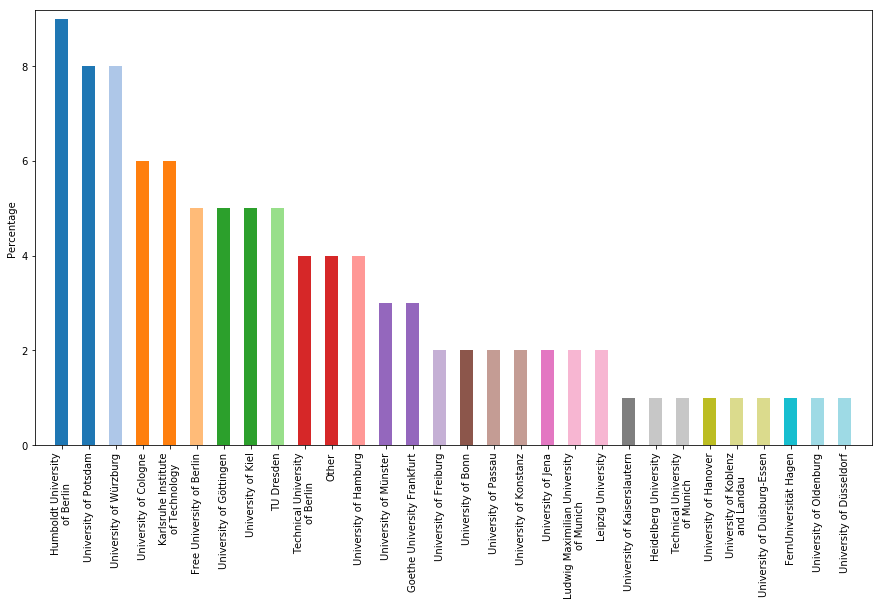

In [67]:
_ = get_plot(perc_to_count, "one choice")

### Which Fraunhofer institute do you work for?

In [68]:
v_to_count, filename  = get_count(df, ['currentEmp20de. Which Fraunhofer institute do you work for?'], "one choice", "./../survey_creation/2017/de/listAnswers/fraunhofer_de.csv", "False", "./2017/de/output/")

In [69]:
perc_to_count = get_percentage(v_to_count, filename)

In [70]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which Fraunhofer institute do you work for?                   
Other                                            2       100.0
NaN                                            323         NaN

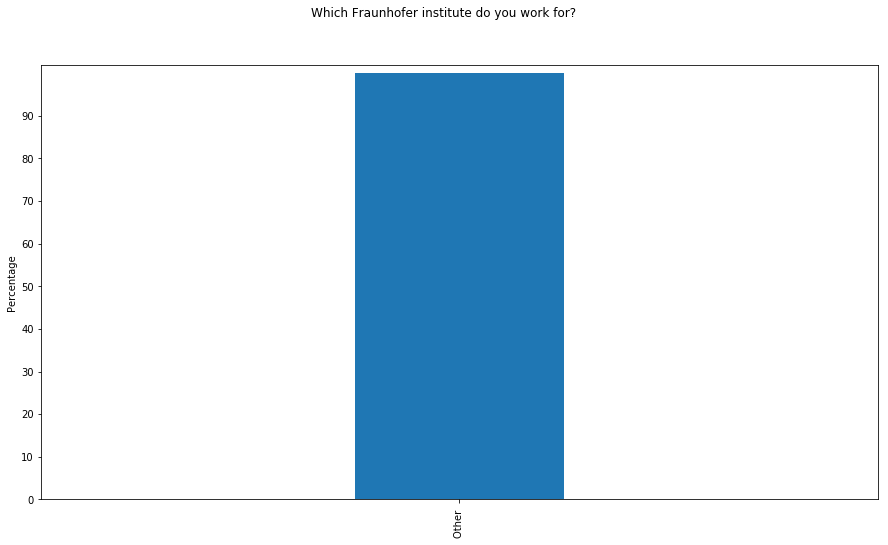

In [71]:
_ = get_plot(perc_to_count, "one choice")

### Which Helmholtz institute do you work for?

In [72]:
v_to_count, filename  = get_count(df, ['currentEmp21de. Which Helmholtz institute do you work for?'], "one choice", "./../survey_creation/2017/de/listAnswers/hgf_de.csv", "False", "./2017/de/output/")

In [73]:
perc_to_count = get_percentage(v_to_count, filename)

In [74]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which Helmholtz institute do you work for?                           
Helmholtz Centre Potsdam, GFZ German Research C...     35        43.0
Alfred Wegener Institute for Polar and Marine R...      6         7.0
Helmholtz Centre for Environmental Research             6         7.0
Karlsruhe Institute of Technology                       6         7.0
German Aerospace Center                                 5         6.0
Helmholtz-Zentrum Dresden-Rossendorf                    5         6.0
Helmholtz-Zentrum Geesthacht Centre for Materia...      4         5.0
GEOMAR Helmholtz Centre for Ocean Research Kiel         4         5.0
German Cancer Research Center                           4         5.0
Helmholtz-Zentrum Berlin                                2         2.0
Max Delbrück Center for Molecular Medicine              2         2.0
Helmholtz Centre for Infection Research                 1         1.0
German Center for Neurodegenerative Diseases            1         1.0
Forschungszentrum Jülich                                1         1.0
NaN                                                   243         NaN

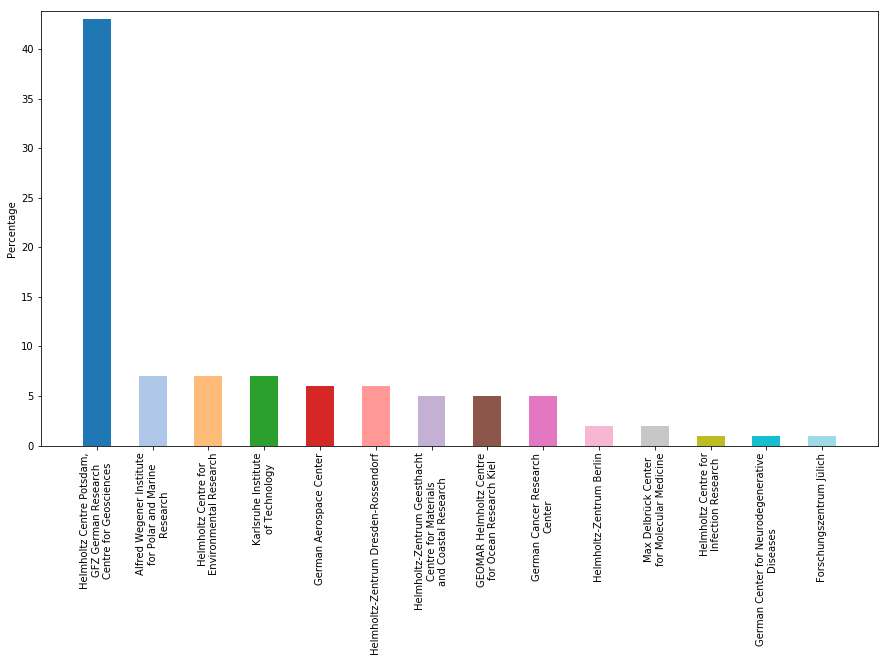

In [75]:
_ = get_plot(perc_to_count, "one choice")

### Which Leibniz institute do you work for?

In [76]:
v_to_count, filename  = get_count(df, ['currentEmp22de. Which Leibniz institute do you work for?'], "one choice", "./../survey_creation/2017/de/listAnswers/leibniz_de.csv", "False", "./2017/de/output/")

In [77]:
perc_to_count = get_percentage(v_to_count, filename)

In [78]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which Leibniz institute do you work for?                             
Potsdam Institute for Climate Impact Research           9        36.0
Leibniz Institute for Astrophysics Potsdam              8        32.0
Weierstrass Institute                                   1         4.0
Leibniz-Institut für Molekulare Pharmakologie           1         4.0
Leibniz Institute of Plant Biochemistry                 1         4.0
Deutsches Institut für Internationale Pädagogis...      1         4.0
German National Library of Economics                    1         4.0
Leibniz Center for Informatics                          1         4.0
Leibniz Institute for Science and Mathematics E...      1         4.0
IDS – Institute for the German Language                 1         4.0
NaN                                                   300         NaN

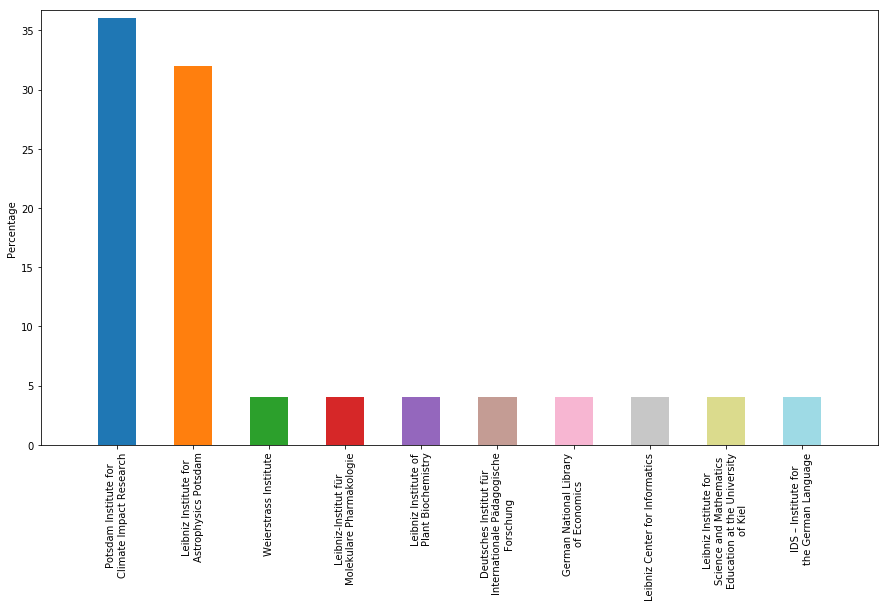

In [79]:
_ = get_plot(perc_to_count, "one choice")

### Which Max-Planck institute do you work for?

In [80]:
v_to_count, filename  = get_count(df, ['currentEmp23de. Which Max-Planck institute do you work for?'], "one choice", "./../survey_creation/2017/de/listAnswers/mpg_de.csv", "False", "./2017/de/output/")

In [81]:
perc_to_count = get_percentage(v_to_count, filename)

In [82]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which Max-Planck institute do you work for?                          
Max Planck Institute for Biophysical Chemistry         11        14.0
Max Planck Institute of Molecular Cell Biology ...     11        14.0
Max Planck Institute for Gravitational Physics          9        11.0
Max Planck Institute for Meteorology                    7         9.0
Other                                                   7         9.0
Max Planck Institute for Brain Research                 4         5.0
Max Planck Institute for Physics                        4         5.0
Max Planck Institute for Dynamics of Complex Te...      3         4.0
Max Planck Institute for Evolutionary Biology           3         4.0
Max Planck Institute for Biophysics                     3         4.0
Max Planck Institute for Colloids and Interfaces        3         4.0
Max Planck Institute for Intelligent Systems            2         2.0
Max Planck Institute for Biogeochemistry                2         2.0
Max Planck Institute for Computer Science               1         1.0
Max Planck Institute for Dynamics and Self-Orga...      1         1.0
Max Planck Institute for Biology                        1         1.0
Max Planck Institute for Metabolism Research            1         1.0
Max Planck Institute for the History of Science         1         1.0
Max Planck Institute for Ornithology                    1         1.0
Max Planck Institute for the Science of Human H...      1         1.0
Max Planck Institute for European History of Law        1         1.0
Max Planck Institute for Medical Research               1         1.0
Max Planck Institute for Cell Biology                   1         1.0
Max Planck Institute for Plant Breeding Research        1         1.0
NaN                                                   245         NaN

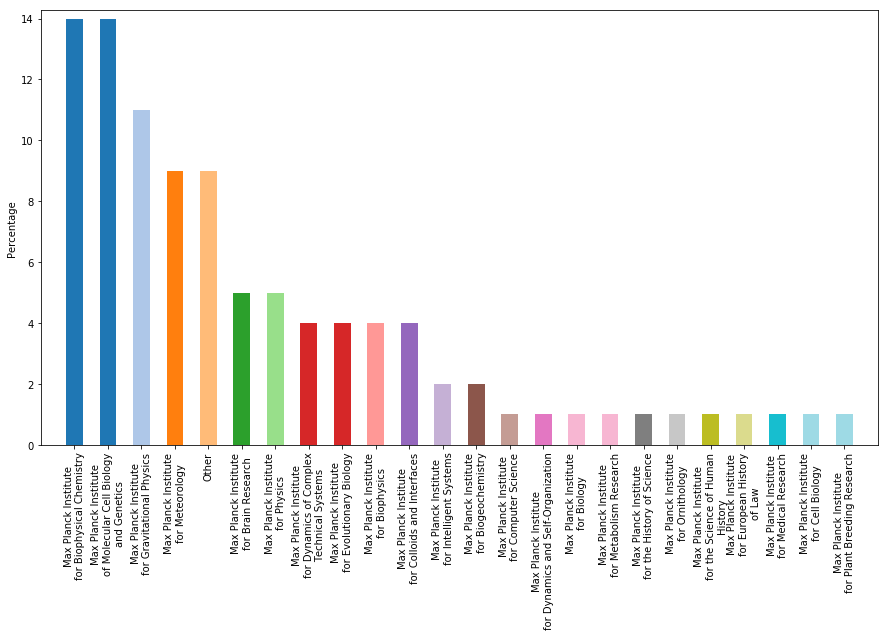

In [83]:
_ = get_plot(perc_to_count, "one choice")

### Which University of Applied Sciences?

In [84]:
v_to_count, filename  = get_count(df, ['currentEmp24de. Which University of Applied Sciences?'], "one choice", "./../survey_creation/2017/de/listAnswers/fh_de.csv", "False", "./2017/de/output/")

In [85]:
perc_to_count = get_percentage(v_to_count, filename)

In [86]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which University of Applied Sciences?                    
University of Applied Sciences Dresden      1       100.0
NaN                                       324         NaN

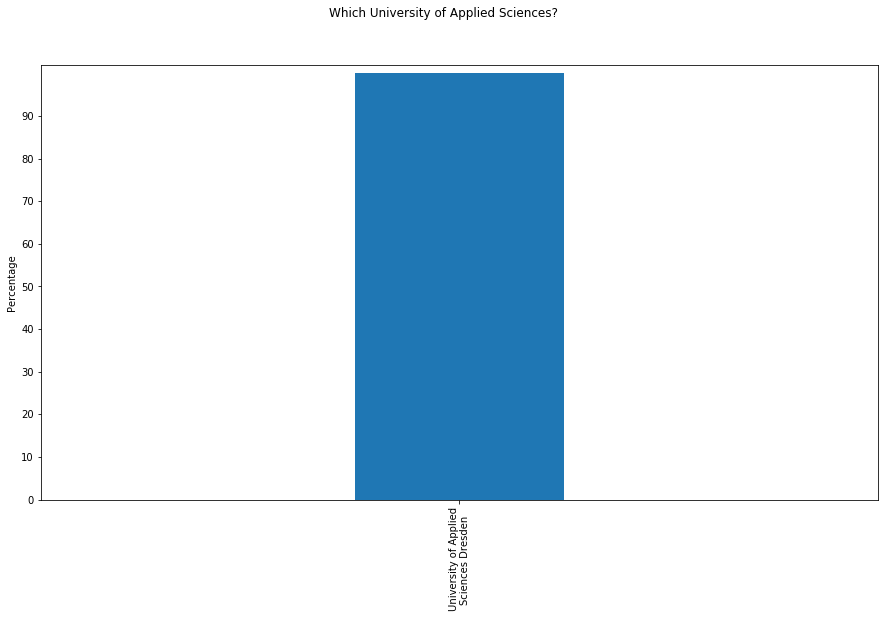

In [87]:
_ = get_plot(perc_to_count, "one choice")

### What is your official job title?

In [88]:
 wc = wordcloud(df, ['currentEmp5. What is your official job title?'])

(-0.5, 1499.5, 799.5, -0.5)

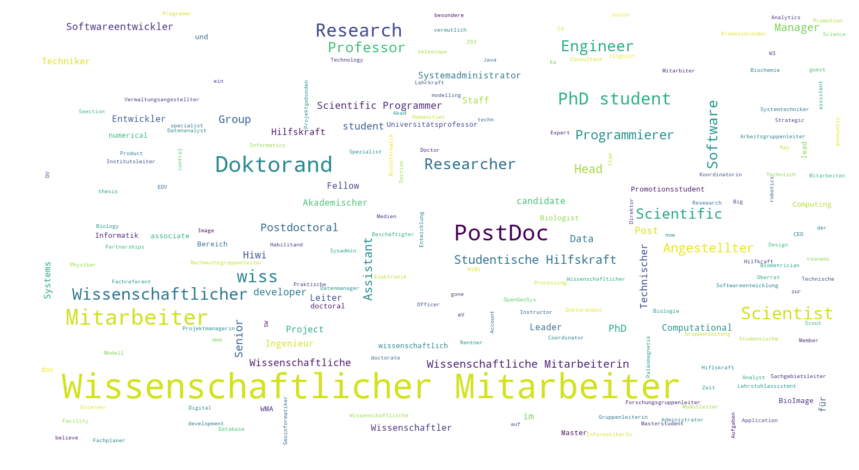

In [89]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Are you known in your group by a different job title? If so, please enter the job title you use

In [90]:
number_of_different_title = df['currentEmp6. Are you known in your group by a different job title? If so, please enter the job title you use'].count()
print('Number of participants with a different title: {}'.format(number_of_different_title))

Number of participants with a different title: 72


In [91]:
 wc = wordcloud(df, ['currentEmp6. Are you known in your group by a different job title? If so, please enter the job title you use'])

(-0.5, 1499.5, 799.5, -0.5)

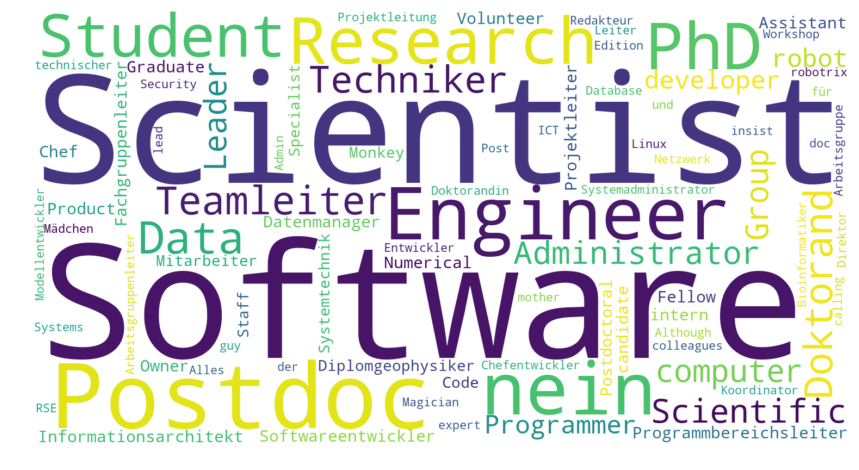

In [92]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### In which disciplines do you work (select as many as apply)

In [93]:
v_to_count, filename  = get_count(df, ['currentEmp13[1]. In which disciplines do you work (select as many as apply) [Accounting & Finance]', 'currentEmp13[2]. In which disciplines do you work (select as many as apply) [Aeronautical & Manufacturing Engineering]', 'currentEmp13[3]. In which disciplines do you work (select as many as apply) [Agriculture & Forestry]', 'currentEmp13[4]. In which disciplines do you work (select as many as apply) [American Studies]', 'currentEmp13[5]. In which disciplines do you work (select as many as apply) [Anatomy & Physiology]', 'currentEmp13[6]. In which disciplines do you work (select as many as apply) [Anthropology]', 'currentEmp13[7]. In which disciplines do you work (select as many as apply) [Architecture]', 'currentEmp13[8]. In which disciplines do you work (select as many as apply) [Art & Design]', 'currentEmp13[9]. In which disciplines do you work (select as many as apply) [Biological Sciences]', 'currentEmp13[10]. In which disciplines do you work (select as many as apply) [Business & Management Studies]', 'currentEmp13[11]. In which disciplines do you work (select as many as apply) [Chemical Engineering]', 'currentEmp13[12]. In which disciplines do you work (select as many as apply) [Chemistry]', 'currentEmp13[13]. In which disciplines do you work (select as many as apply) [Civil Engineering]', 'currentEmp13[14]. In which disciplines do you work (select as many as apply) [Classics & Ancient History]', 'currentEmp13[15]. In which disciplines do you work (select as many as apply) [Communication & Media Studies]', 'currentEmp13[16]. In which disciplines do you work (select as many as apply) [Complementary Medicine]', 'currentEmp13[17]. In which disciplines do you work (select as many as apply) [Computer Science]', 'currentEmp13[18]. In which disciplines do you work (select as many as apply) [Counselling]', 'currentEmp13[19]. In which disciplines do you work (select as many as apply) [Criminology]', 'currentEmp13[20]. In which disciplines do you work (select as many as apply) [Dentistry]', 'currentEmp13[21]. In which disciplines do you work (select as many as apply) [East & South Asian Studies]', 'currentEmp13[22]. In which disciplines do you work (select as many as apply) [Economics]', 'currentEmp13[23]. In which disciplines do you work (select as many as apply) [Education]', 'currentEmp13[24]. In which disciplines do you work (select as many as apply) [Electrical & Electronic Engineering]', 'currentEmp13[25]. In which disciplines do you work (select as many as apply) [English]', 'currentEmp13[26]. In which disciplines do you work (select as many as apply) [Fashion]', 'currentEmp13[27]. In which disciplines do you work (select as many as apply) [Food Science]', 'currentEmp13[28]. In which disciplines do you work (select as many as apply) [French]', 'currentEmp13[29]. In which disciplines do you work (select as many as apply) [Geography & Environmental Sciences]', 'currentEmp13[30]. In which disciplines do you work (select as many as apply) [Geology]', 'currentEmp13[31]. In which disciplines do you work (select as many as apply) [General Engineering]', 'currentEmp13[32]. In which disciplines do you work (select as many as apply) [German]', 'currentEmp13[33]. In which disciplines do you work (select as many as apply) [History]', 'currentEmp13[34]. In which disciplines do you work (select as many as apply) [History of Art, Architecture & Design]', 'currentEmp13[35]. In which disciplines do you work (select as many as apply) [Hospitality, Leisure, Recreation & Tourism]', 'currentEmp13[36]. In which disciplines do you work (select as many as apply) [Iberian Languages/Hispanic Studies]', 'currentEmp13[37]. In which disciplines do you work (select as many as apply) [Land & Property Management]', 'currentEmp13[38]. In which disciplines do you work (select as many as apply) [Law]', 'currentEmp13[39]. In which disciplines do you work (select as many as apply) [Librarianship & Information Management]', 'currentEmp13[40]. In which disciplines do you work (select as many as apply) [Linguistics]', 'currentEmp13[41]. In which disciplines do you work (select as many as apply) [Marketing]', 'currentEmp13[42]. In which disciplines do you work (select as many as apply) [Materials Technology]', 'currentEmp13[43]. In which disciplines do you work (select as many as apply) [Mathematics]', 'currentEmp13[44]. In which disciplines do you work (select as many as apply) [Mechanical Engineering]', 'currentEmp13[45]. In which disciplines do you work (select as many as apply) [Medicine]', 'currentEmp13[46]. In which disciplines do you work (select as many as apply) [Middle Eastern and African Studies]', 'currentEmp13[47]. In which disciplines do you work (select as many as apply) [Music]', 'currentEmp13[48]. In which disciplines do you work (select as many as apply) [Nursing]', 'currentEmp13[49]. In which disciplines do you work (select as many as apply) [Ophthalmics]', 'currentEmp13[50]. In which disciplines do you work (select as many as apply) [Pharmacology & Pharmacy]', 'currentEmp13[51]. In which disciplines do you work (select as many as apply) [Philosophy]', 'currentEmp13[52]. In which disciplines do you work (select as many as apply) [Physics and Astronomy]', 'currentEmp13[53]. In which disciplines do you work (select as many as apply) [Physiotherapy]', 'currentEmp13[54]. In which disciplines do you work (select as many as apply) [Politics]', 'currentEmp13[55]. In which disciplines do you work (select as many as apply) [Psychology]', 'currentEmp13[56]. In which disciplines do you work (select as many as apply) [Robotics]', 'currentEmp13[57]. In which disciplines do you work (select as many as apply) [Russian & East European Languages]', 'currentEmp13[58]. In which disciplines do you work (select as many as apply) [Social Policy]', 'currentEmp13[59]. In which disciplines do you work (select as many as apply) [Social Work]', 'currentEmp13[60]. In which disciplines do you work (select as many as apply) [Sociology]', 'currentEmp13[61]. In which disciplines do you work (select as many as apply) [Sports Science]', 'currentEmp13[62]. In which disciplines do you work (select as many as apply) [Theology & Religious Studies]', 'currentEmp13[63]. In which disciplines do you work (select as many as apply) [Town & Country Planning and Landscape Design]', 'currentEmp13[64]. In which disciplines do you work (select as many as apply) [Veterinary Medicine]', 'currentEmp13[65]. In which disciplines do you work (select as many as apply) [Youth Work]'], "multiple choices", "./../survey_creation/2017/de/listAnswers/academic_field.csv", "False", "./2017/de/output/")

In [94]:
perc_to_count = get_percentage(v_to_count, filename)

In [95]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                               
Computer Science                                113        18.0
Physics and Astronomy                            89        14.0
Biological Sciences                              87        14.0
Geography & Environmental Sciences               66        10.0
Mathematics                                      30         5.0
Geology                                          24         4.0
Chemistry                                        20         3.0
Librarianship & Information Management           18         3.0
Education                                        17         3.0
Medicine                                         17         3.0
Electrical & Electronic Engineering              12         2.0
General Engineering                              10         2.0
Linguistics                                      10         2.0
Classics & Ancient History                       10         2.0
Psychology                                        9         1.0
Robotics                                          9         1.0
Economics                                         9         1.0
History                                           9         1.0
Mechanical Engineering                            7         1.0
Agriculture & Forestry                            7         1.0
Chemical Engineering                              6         1.0
Theology & Religious Studies                      5         1.0
German                                            5         1.0
Anatomy & Physiology                              4         1.0
Pharmacology & Pharmacy                           3         0.0
History of Art, Architecture & Design             3         0.0
Aeronautical & Manufacturing Engineering          3         0.0
Accounting & Finance                              3         0.0
Civil Engineering                                 3         0.0
Communication & Media Studies                     3         0.0
Law                                               2         0.0
Food Science                                      2         0.0
Business & Management Studies                     2         0.0
Counselling                                       2         0.0
Philosophy                                        2         0.0
Art & Design                                      2         0.0
Veterinary Medicine                               2         0.0
Middle Eastern and African Studies                1         0.0
Politics                                          1         0.0
Architecture                                      1         0.0
Anthropology                                      1         0.0
Sports Science                                    1         0.0
Nursing                                           1         0.0
Town & Country Planning and Landscape Design      1         0.0
French                                            1         0.0
Music                                             1         0.0
Marketing                                         1         0.0
Iberian Languages/Hispanic Studies                1         0.0
Materials Technology                              1         0.0
Complementary Medicine                            0         0.0
Social Policy                                     0         0.0
Fashion                                           0         0.0
English                                           0         0.0
American Studies                                  0         0.0
East & South Asian Studies                        0         0.0
Sociology                                         0         0.0
Social Work                                       0         0.0
Dentistry                                         0         0.0
Russian & East European Languages                 0         0.0
Hospitality, Leisure, Recreation & Tourism        0         0.0
Physiotherapy                                     0         0.0
Land & Propert

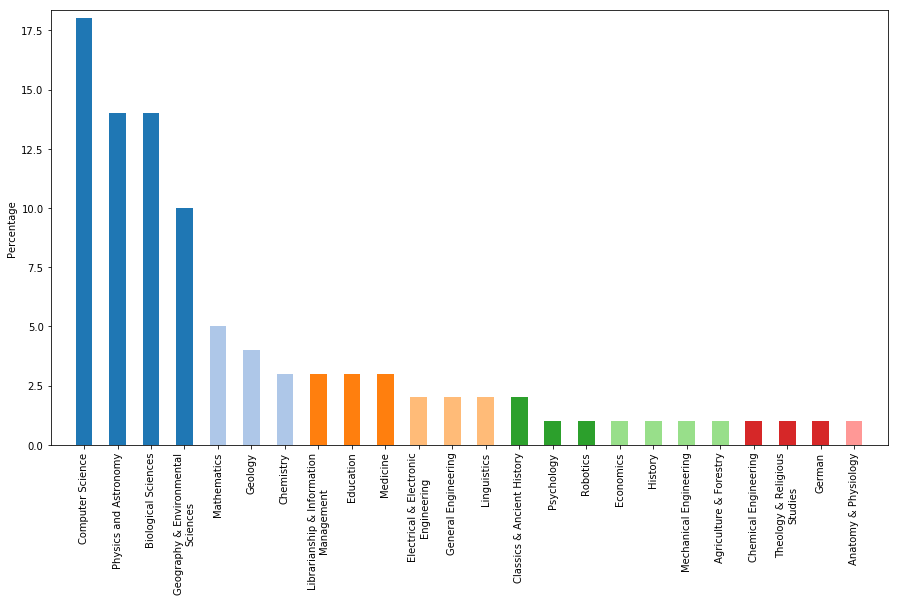

In [96]:
_ = get_plot(perc_to_count, "multiple choices")

# Questions about the type of contract

Type of contracts and funding are important to understand the situation of RSEs and if they have stable position in academia. 
A vast majority of participants have a full time job (78%) but it is often a fixed term position (34% as long as funding is available and 26% are funded by the Institution core funding). 27% of them do have a permanent position (the other types of contract are marginals). The average length of contract duration is more or less 5 years for the participants that does not have a permanent position. 

For the source of funding, 61% of the participants know the origin of them. The vast majority of the project for which the participants work  are funded by Federal and state governments (42%), the German Research Foundation (DFG) (34%), and by the European Union 10%. 5% of the participants claims they volunteer their time for working on the largest project. 

A question also asked about the funding about their effort as an RSE/equivalent. The top four funders remains the same. The Federal and state governments funds is funding 38% of the participants, the German Research Foundation 31% and the European Union 13% and 8% of the participants volunteer their time.

The last question about the funding was about the previous project. This helps to see if the funders changed over the time for the participants. The answer is no, the three mains funders were exactly the same with only a slight variation in percentages, the Federal and state governments funded the project of 43% of the participants, while the German Research Foundation accounted for 31% and European Union for 11%.

It is important to note that these percentages are not mutually exclusives as the participants had the option to choose several sources of funding for each question. 

### Do you work full time or part time

In [97]:
v_to_count, filename  = get_count(df, ['currentEmp12. Do you work full time or part time'], "one choice", "./../survey_creation/2017/de/listAnswers/type_hours.csv", "False", "./2017/de/output/")

In [98]:
perc_to_count = get_percentage(v_to_count, filename)

In [99]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Do you work full time or part time                   
Full Time                             255        78.0
Part-time                              70        22.0

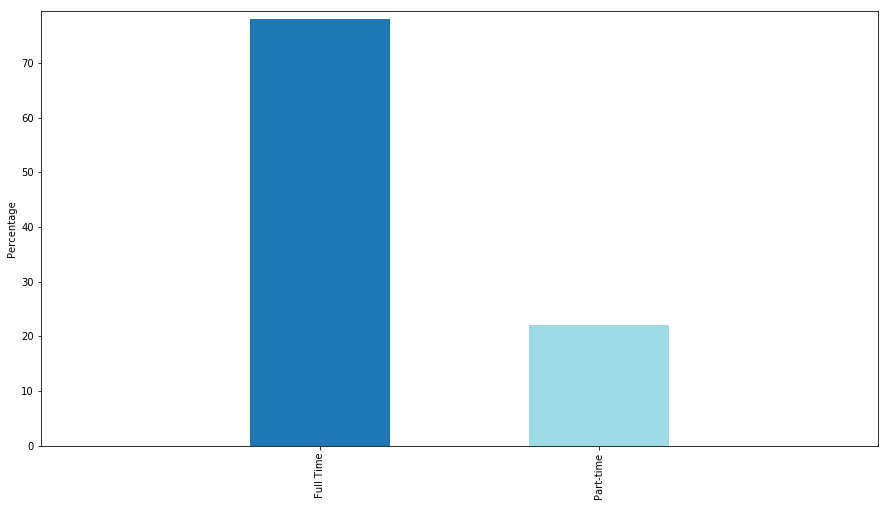

In [100]:
_ = get_plot(perc_to_count, "one choice")

### What type of contract are you employed on?

In [101]:
v_to_count, filename  = get_count(df, ['currentEmp10. What type of contract are you employed on?'], "one choice", "./../survey_creation/2017/de/listAnswers/type_contract_de.csv", "False", "./2017/de/output/")

In [102]:
perc_to_count = get_percentage(v_to_count, filename)

In [103]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What type of contract are you employed on?                         
Fixed term -- as long as funding is available       110        34.0
Permanent -- funded by Institution core funding      88        27.0
Fixed term -- funded by Institution core funding     83        26.0
Research/Student Assistant                           19         6.0
Other                                                15         5.0
Permanent -- as long as funding is available          5         2.0
Freelancer consultant contractor                      3         1.0
Agency staff                                          1         0.0
Zero hours contract                                   1         0.0

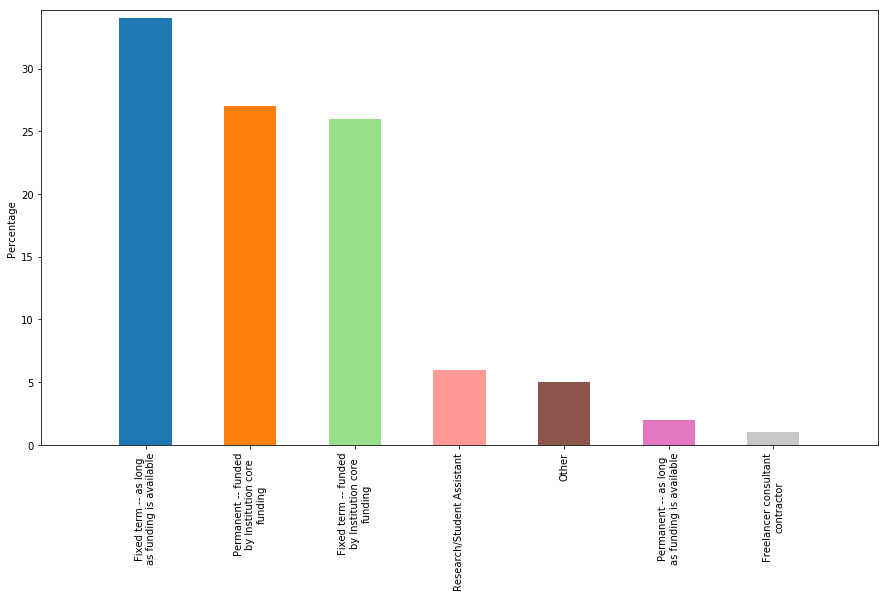

In [104]:
_ = get_plot(perc_to_count, "one choice")

### What is the duration (in years) of your current contract?

In [105]:
# Cleaning some outliers
duration_contract = df['currentEmp11. What is the duration (in years) of your current contract?'][(df['currentEmp11. What is the duration (in years) of your current contract?'] > -1) & (df['currentEmp11. What is the duration (in years) of your current contract?'] < 70)].to_frame()

In [106]:
v_to_count, filename  = get_count(duration_contract, ['currentEmp11. What is the duration (in years) of your current contract?'], "freenumeric", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

       What is the duration (in years) of your current contract?
count                                         297.000000        
mean                                            5.570818        
std                                             8.632102        
min                                             0.000000        
25%                                             1.000000        
50%                                             3.000000        
75%                                             4.000000        
max                                            50.000000        


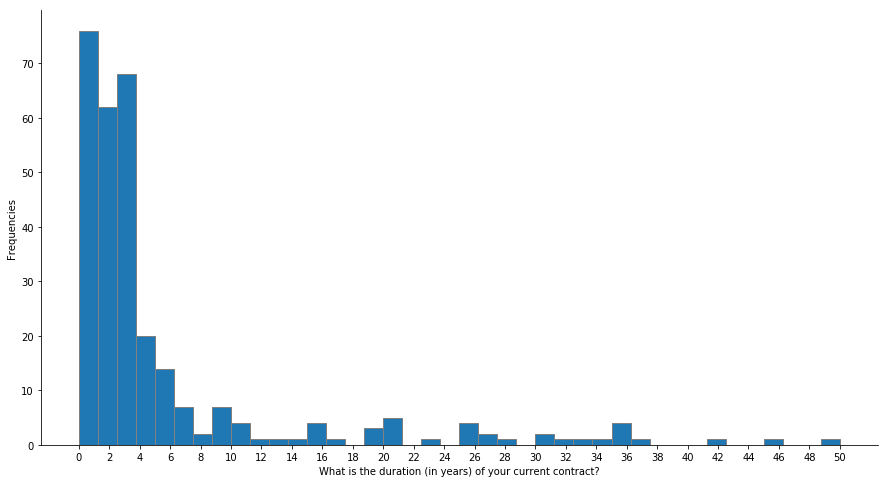

In [107]:
_ = get_plot(v_to_count, "freenumeric")

### Do you know the source of the funding used to support you and your current, largest project?

In [108]:
v_to_count, filename  = get_count(df, ['fund1. Do you know the source of the funding used to support you and your current, largest project?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [109]:
perc_to_count = get_percentage(v_to_count, filename)

In [110]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you know the source of the funding used to s...          183         116   

                                                    NaN value  \
Do you know the source of the funding used to s...         26   

                                                    Yes [Percentage]  \
Do you know the source of the funding used to s...              61.0   

                                                    No [Percentage]  
Do you know the source of the funding used to s...             39.0

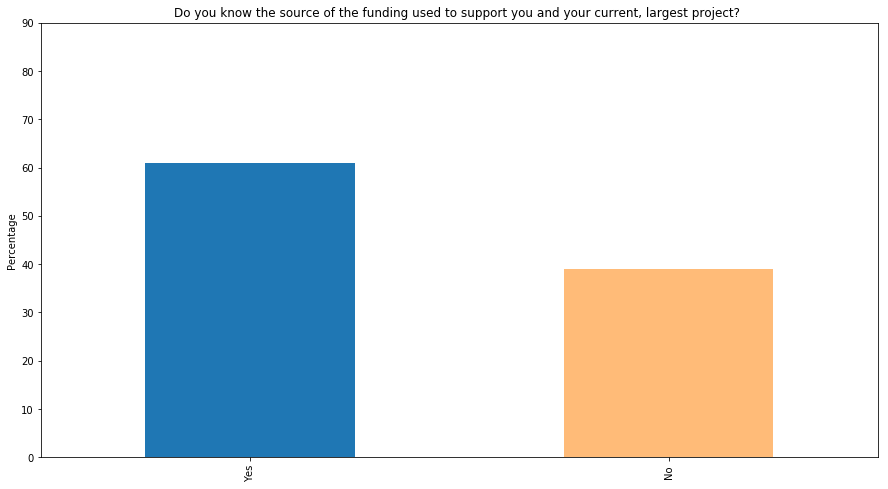

In [111]:
_ = get_plot(perc_to_count, "y/n/na")

### Which of the following sources are used to pay for your effort as an RSE/equivalent?

In [112]:
v_to_count, filename  = get_count(df, ['fund2[1]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [European Union (e.g. H2020, COST, EUREKA)]', 'fund2[2]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Federal and state governments (BMBF, BMWi, BMVg and other sections)]', 'fund2[3]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [DFG, German Research Foundation]', 'fund2[4]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Foundations and conveyors (public and private, e.g. VolkswagenStiftung, Robert Bosch Stiftung, Klaus Tschira Stiftung, Stiftung Mercator)]', 'fund2[5]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Stifterverband]', 'fund2[6]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Associations and chambers]', 'fund2[7]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Membership]', 'fund2[8]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (one-time)]', 'fund2[9]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (recurring)]', 'fund2[10]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Industry support]', 'fund2[11]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Consulting & services]', 'fund2[12]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Venture capital]', 'fund2[13]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Dual license]', 'fund2[14]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Open core]', 'fund2[15]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Trademark licensing & franchising]', 'fund2[16]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [I volunteer my time]'], "multiple choices", "./../survey_creation/2017/de/listAnswers/funding_de.csv", "False", "./2017/de/output/")

In [113]:
perc_to_count = get_percentage(v_to_count, filename)

In [114]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                                     
Federal and state governments (BMBF, BMWi, BMVg...    110        38.0
DFG, German Research Foundation                        89        31.0
European Union (e.g. H2020, COST, EUREKA)              38        13.0
I volunteer my time                                    21         7.0
Foundations and conveyors (public and private, ...     13         4.0
Industry support                                        7         2.0
Consulting & services                                   4         1.0
Membership                                              3         1.0
Stifterverband                                          1         0.0
Associations and chambers                               1         0.0
Venture capital                                         1         0.0
Dual license                                            1         0.0
Crowdfunding (one-time)                                 0         0.0
Crowdfunding (recurring)                                0         0.0
Open core                                               0         0.0
Trademark licensing & franchising                       0         0.0

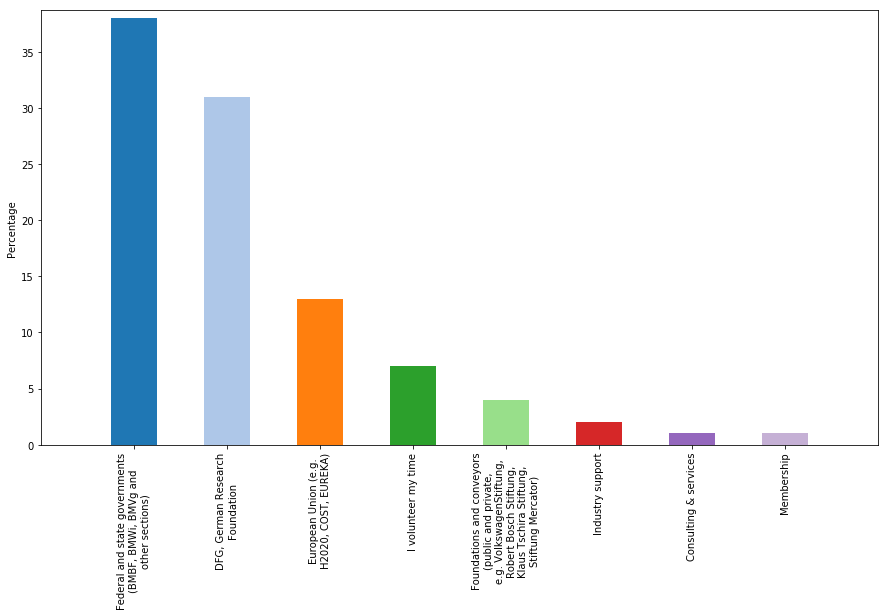

In [115]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources are used to fund your current, largest project?

In [116]:
v_to_count, filename  = get_count(df, ['fund3[1]. Which of the following sources are used to fund your current, largest project? [European Union (e.g. H2020, COST, EUREKA)]', 'fund3[2]. Which of the following sources are used to fund your current, largest project? [Federal and state governments (BMBF, BMWi, BMVg and other sections)]', 'fund3[3]. Which of the following sources are used to fund your current, largest project? [DFG, German Research Foundation]', 'fund3[4]. Which of the following sources are used to fund your current, largest project? [Foundations and conveyors (public and private, e.g. VolkswagenStiftung, Robert Bosch Stiftung, Klaus Tschira Stiftung, Stiftung Mercator)]', 'fund3[5]. Which of the following sources are used to fund your current, largest project? [Stifterverband]', 'fund3[6]. Which of the following sources are used to fund your current, largest project? [Associations and chambers]', 'fund3[7]. Which of the following sources are used to fund your current, largest project? [Membership]', 'fund3[8]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (one-time)]', 'fund3[9]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (recurring)]', 'fund3[10]. Which of the following sources are used to fund your current, largest project? [Industry support]', 'fund3[11]. Which of the following sources are used to fund your current, largest project? [Consulting & services]', 'fund3[12]. Which of the following sources are used to fund your current, largest project? [Venture capital]', 'fund3[13]. Which of the following sources are used to fund your current, largest project? [Dual license]', 'fund3[14]. Which of the following sources are used to fund your current, largest project? [Open core]', 'fund3[15]. Which of the following sources are used to fund your current, largest project? [Trademark licensing & franchising]', 'fund3[16]. Which of the following sources are used to fund your current, largest project? [I volunteer my time]'], "multiple choices", "./../survey_creation/2017/de/listAnswers/funding_de.csv", "False", "./2017/de/output/")

In [117]:
perc_to_count = get_percentage(v_to_count, filename)

In [118]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                                     
Federal and state governments (BMBF, BMWi, BMVg...     93        42.0
DFG, German Research Foundation                        75        34.0
European Union (e.g. H2020, COST, EUREKA)              23        10.0
I volunteer my time                                    12         5.0
Foundations and conveyors (public and private, ...      9         4.0
Industry support                                        3         1.0
Stifterverband                                          1         0.0
Associations and chambers                               1         0.0
Membership                                              1         0.0
Consulting & services                                   1         0.0
Crowdfunding (one-time)                                 0         0.0
Crowdfunding (recurring)                                0         0.0
Venture capital                                         0         0.0
Dual license                                            0         0.0
Open core                                               0         0.0
Trademark licensing & franchising                       0         0.0

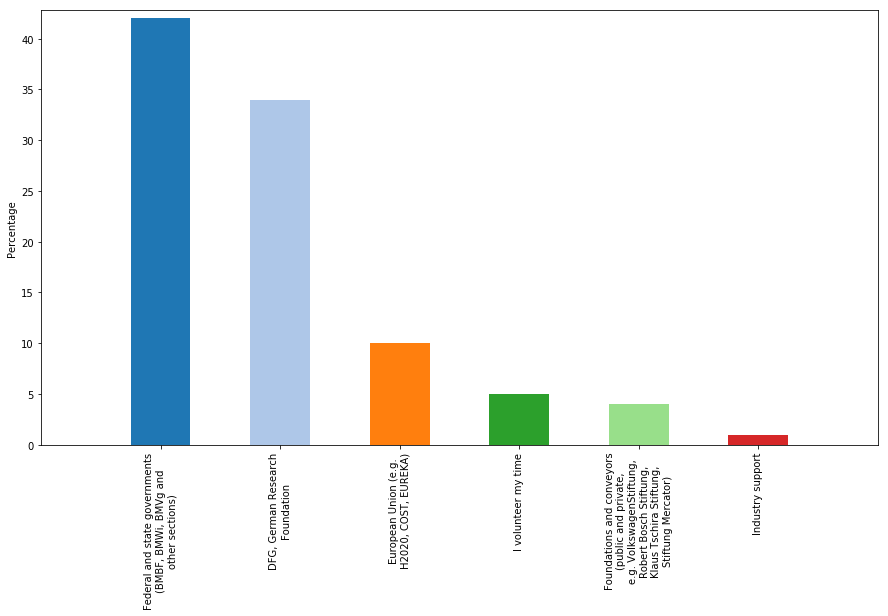

In [119]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources were used to fund your current, largest project three years ago?

In [120]:
v_to_count, filename  = get_count(df, ['fund4[1]. Which of the following sources were used to fund your current, largest project three years ago? [European Union (e.g. H2020, COST, EUREKA)]', 'fund4[2]. Which of the following sources were used to fund your current, largest project three years ago? [Federal and state governments (BMBF, BMWi, BMVg and other sections)]', 'fund4[3]. Which of the following sources were used to fund your current, largest project three years ago? [DFG, German Research Foundation]', 'fund4[4]. Which of the following sources were used to fund your current, largest project three years ago? [Foundations and conveyors (public and private, e.g. VolkswagenStiftung, Robert Bosch Stiftung, Klaus Tschira Stiftung, Stiftung Mercator)]', 'fund4[5]. Which of the following sources were used to fund your current, largest project three years ago? [Stifterverband]', 'fund4[6]. Which of the following sources were used to fund your current, largest project three years ago? [Associations and chambers]', 'fund4[7]. Which of the following sources were used to fund your current, largest project three years ago? [Membership]', 'fund4[8]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (one-time)]', 'fund4[9]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (recurring)]', 'fund4[10]. Which of the following sources were used to fund your current, largest project three years ago? [Industry support]', 'fund4[11]. Which of the following sources were used to fund your current, largest project three years ago? [Consulting & services]', 'fund4[12]. Which of the following sources were used to fund your current, largest project three years ago? [Venture capital]', 'fund4[13]. Which of the following sources were used to fund your current, largest project three years ago? [Dual license]', 'fund4[14]. Which of the following sources were used to fund your current, largest project three years ago? [Open core]', 'fund4[15]. Which of the following sources were used to fund your current, largest project three years ago? [Trademark licensing & franchising]', 'fund4[16]. Which of the following sources were used to fund your current, largest project three years ago? [I volunteer my time]'], "multiple choices", "./../survey_creation/2017/de/listAnswers/funding_de.csv", "False", "./2017/de/output/")

In [121]:
perc_to_count = get_percentage(v_to_count, filename)

In [122]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                                     
Federal and state governments (BMBF, BMWi, BMVg...     87        43.0
DFG, German Research Foundation                        63        31.0
European Union (e.g. H2020, COST, EUREKA)              23        11.0
I volunteer my time                                    16         8.0
Foundations and conveyors (public and private, ...      6         3.0
Industry support                                        5         2.0
Associations and chambers                               2         1.0
Stifterverband                                          1         0.0
Open core                                               1         0.0
Membership                                              0         0.0
Crowdfunding (one-time)                                 0         0.0
Crowdfunding (recurring)                                0         0.0
Consulting & services                                   0         0.0
Venture capital                                         0         0.0
Dual license                                            0         0.0
Trademark licensing & franchising                       0         0.0

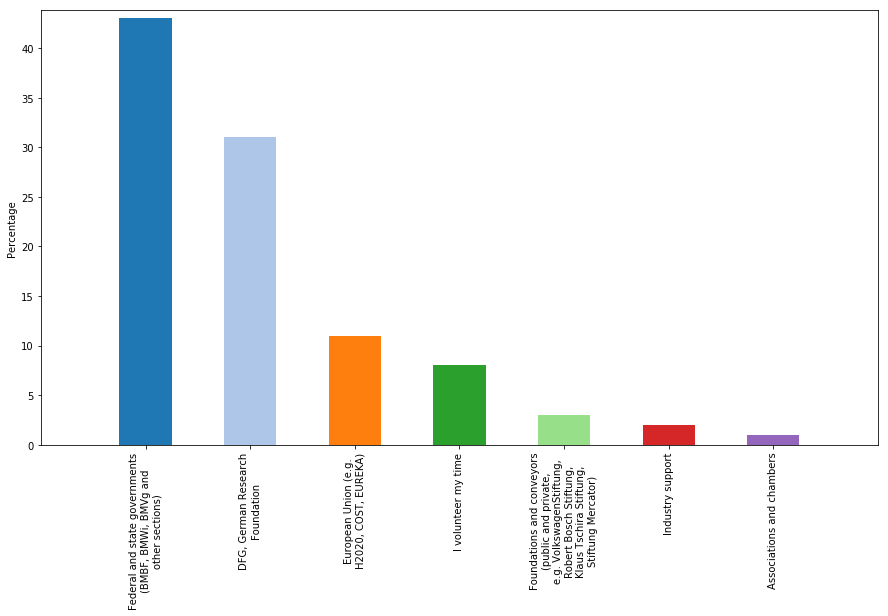

In [123]:
_ = get_plot(perc_to_count, "multiple choices")

# Question about previous employment

Several questions were about the participants previous job. The idea is to collect insight of their career and understand what are their motivation to be an RSE. 

More than a half of the participants worked in a university prior to their current position(54%). The others come from Max Planck Society (11%) or Other (10%).
At least 10% shift career and moved from the private sector to academy. 

We asked the participants to rank the reasons why they chose their actual position among 8 different ones:
* Desire to work in a research environment
* Freedom to choose own working practices
* Desire to advance research
* I want to learn new skills
* Opportunity to develop software
* Flexible working hours
* Ability to work across disciplines
* Opportunity for career advancement
* The salary 	

It appears that the Desire to work in a research environment, the Freedom to choose own working practices and the desire to advance research are more often ranked as the first reasons than any others one. On the contrarious, the Opportunity for career advancement and the salary are the least common reasons for choosing a position as RSE. 

### Where was your previous job based?

In [124]:
v_to_count, filename  = get_count(df, ['prevEmp1. Where was your previous job based?'], "one choice", "./../survey_creation/2017/de/listAnswers/type_organisation_de.csv", "False", "./2017/de/output/")

In [125]:
perc_to_count = get_percentage(v_to_count, filename)

In [126]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Where was your previous job based?                                 
University                                          171        54.0
Max Planck Society                                   35        11.0
Private Company                                      33        10.0
Other                                                33        10.0
Helmholtz Association of German Research Centres     22         7.0
Leibniz Association                                  12         4.0
Government                                            7         2.0
University of Applied Sciences                        3         1.0
NaN                                                   9         NaN

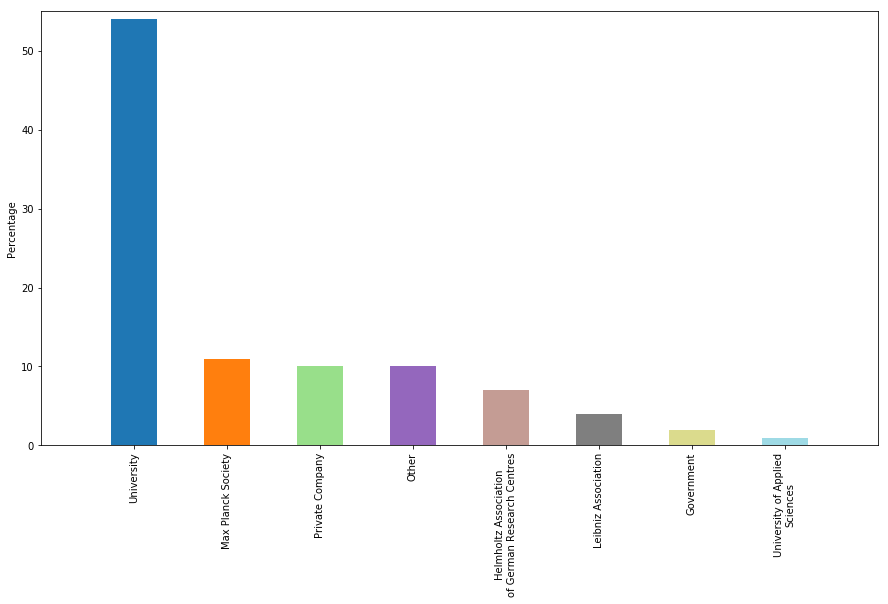

In [127]:
_ = get_plot(perc_to_count, "one choice")

### Rank the following factors dependent on how strongly they influenced your decision to accept your current position

In [128]:
v_to_count, filename  = get_count(df, ['prevEmp2[1]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 1]', 'prevEmp2[2]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 2]', 'prevEmp2[3]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 3]', 'prevEmp2[4]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 4]', 'prevEmp2[5]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 5]'], "ranking", "./../survey_creation/2017/de/listAnswers/decision_job.csv", "False", "./2017/de/output/")

In [129]:
perc_to_count = get_percentage(v_to_count, filename)

In [130]:
display_side_by_side(v_to_count,perc_to_count)

Rank 1 [Count]  Rank 2 [Count]  \
Desire to work in a research environment              80              47   
Freedom to choose own working practices               78              54   
Desire to advance research                            49              40   
I want to learn new skills                            29              50   
Opportunity to develop software                       21              34   
Flexible working hours                                19              28   
Ability to work across disciplines                    17              36   
Opportunity for career advancement                    17              20   
The salary                                             6               6   
NaN                                                    9              10   

                                          Rank 3 [Count]  Rank 4 [Count]  \
Desire to work in a research environment              40              27   
Freedom to choose own working practices               42              30   
Desire to advance research                            26              32   
I want to learn new skills                            62              58   
Opportunity to develop software                       26              39   
Flexible working hours                                44              38   
Ability to work across disciplines                    47              45   
Opportunity for career advancement                    16              24   
The salary                                            12              21   
NaN                                                   10              11   

                                          Rank 5 [Count]  Rank 1 [Percentage]  \
Desire to work in a research environment              26                 36.0   
Freedom to choose own working practices               32                 33.0   
Desire to advance research                            20                 29.0   
I want to learn new skills                            46                 12.0   
Opportunity to develop software                       34                 14.0   
Flexible working hours                                51                 11.0   
Ability to work across disciplines                    49                  9.0   
Opportunity for career advancement                    23                 17.0   
The salary                                            33                  8.0   
NaN                                                   11                  NaN   

                                          Rank 2 [Percentage]  \
Desire to work in a research environment                 21.0   
Freedom to choose own working practices                  23.0   
Desire to advance research                               24.0   
I want to learn new skills                               20.0   
Opportunity to develop software                          22.0   
Flexible working hours                                   16.0   
Ability to work across disciplines                       19.0   
Opportunity for career advancement                       20.0   
The salary                                                8.0   
NaN                                                       NaN   

                                          Rank 3 [Percentage]  \
Desire to work in a research environment                 18.0   
Freedom to choose own working practices                  18.0   
Desire to advance research                               16.0   
I want to learn new skills                               25.0   
Opportunity to develop software                          17.0   
Flexible working hours                                   24.0   
Ability to work across disciplines                       24.0   
Opportunity for career advancement                       16.0   
The salary                                               15.0   
NaN                                                       NaN   

                                          Ra

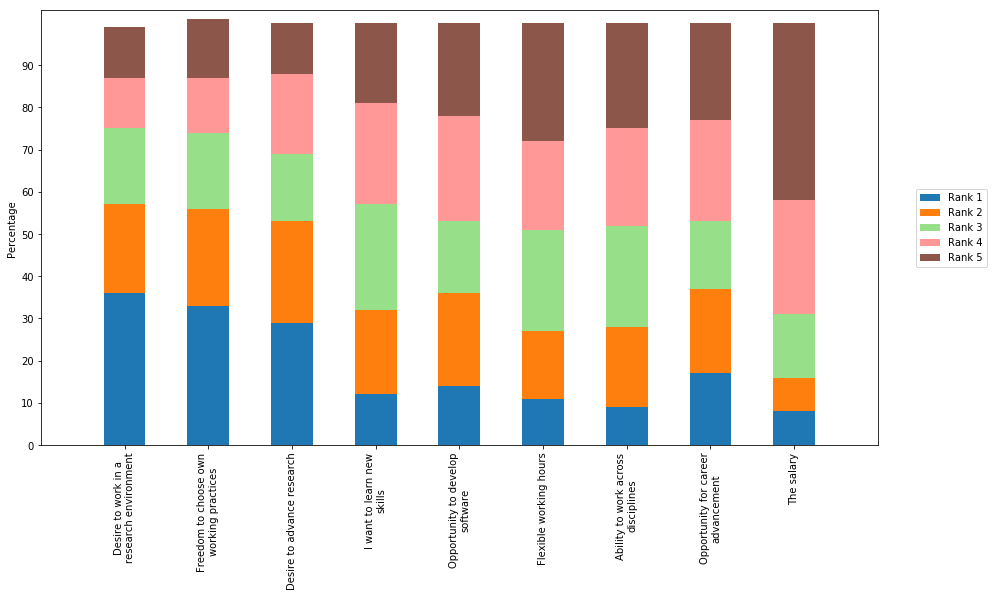

In [131]:
_ = get_plot(perc_to_count, "ranking")

# Collaboration and training

RSEs do not work for themselves, their role involves writing code that is used by others (as seen in section 4), but the collaboration can take other forms. This is why we asked with whom the participants work with. Usually, they seems to be embedded in a stable group, 64% of them report to work with the same researchers, while a minority as a more flexible collaboration (36%).
On the side of collaboration, we wanted to know if they were working within a stable group of researcher software. It is the case for 56% of them, while 44% do not have such group. 

Working for researchers or working within a research software group is different than working on the same project with other developers. We then ask how much software developers typically work on the same project as the participants. It appears that RSEs work more often as the sole developer (35%) on the project or in pair (32%). Being between 3 and 5 developers is not that uncommon (24%) but bigger projects than that are marginals.

RSEs have programming skills that is not necessarily shared within their field. Therefore, they can train other researchers to develop some best practices or learn how to program more efficiently. 66% of them participate to such training. They are not teaching directly to students but transferring skills is an important aspect of their job. In average, they do training twice a year and according to the wordcloud, this training is more often under the form of workshop than traditional teaching. A type of training probably more adapted to teach computing skills. 

## Collaboration

### Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?

In [132]:
v_to_count, filename  = get_count(df, ['currentWork1. Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?'], "one choice", "./../survey_creation/2017/de/listAnswers/work_researchers.csv", "False", "./2017/de/output/")

In [133]:
perc_to_count = get_percentage(v_to_count, filename)

In [134]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Do you always work with the same researcher(s),...                   
Same researcher(s)                                    192        64.0
Regularly change researcher(s)                        107        36.0
NaN                                                    26         NaN

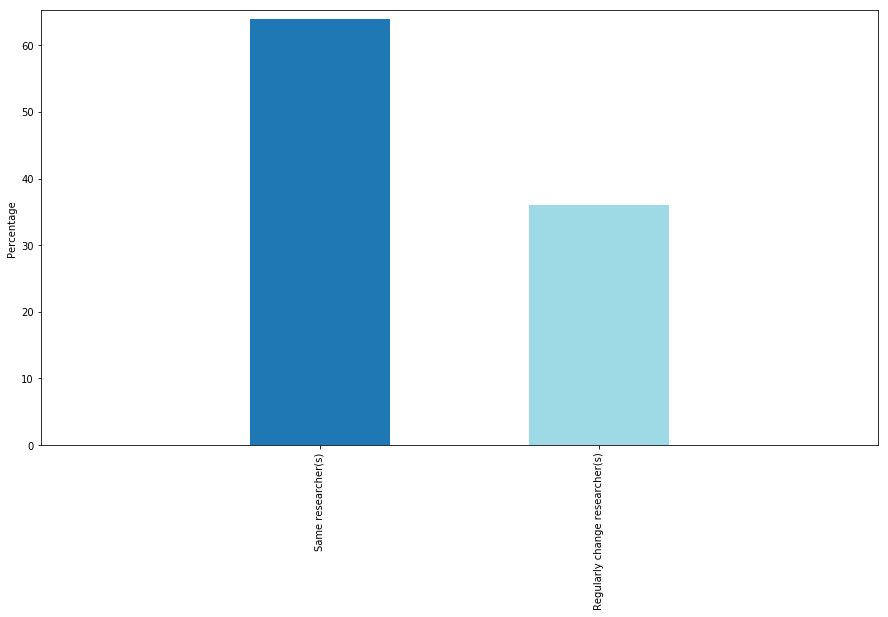

In [135]:
_ = get_plot(perc_to_count, "one choice")

### Do you work for a Research Software Group?

In [136]:
v_to_count, filename  = get_count(df, ['currentWork2. Do you work for a Research Software Group?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [137]:
perc_to_count = get_percentage(v_to_count, filename)

In [138]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you work for a Research Software Group?          169         131   

                                            NaN value  Yes [Percentage]  \
Do you work for a Research Software Group?         25              56.0   

                                            No [Percentage]  
Do you work for a Research Software Group?             44.0

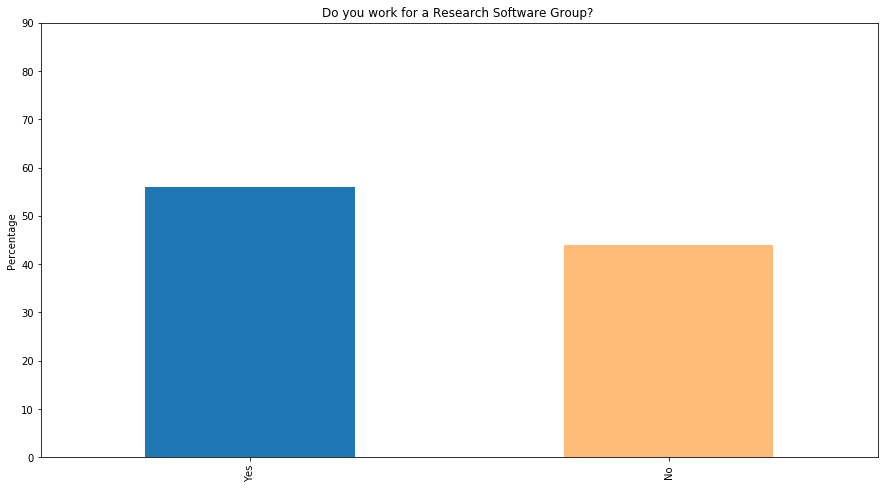

In [139]:
_ = get_plot(perc_to_count, "y/n/na")

### How many software projects are you currently involved in?

In [140]:
v_to_count, filename  = get_count(df, ['proj1can. How many software projects are you currently involved in?'], "freenumeric", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

       How many software projects are you currently involved in?
count                                         300.000000        
mean                                            3.160000        
std                                             3.226313        
min                                             0.000000        
25%                                             1.000000        
50%                                             3.000000        
75%                                             4.000000        
max                                            30.000000        


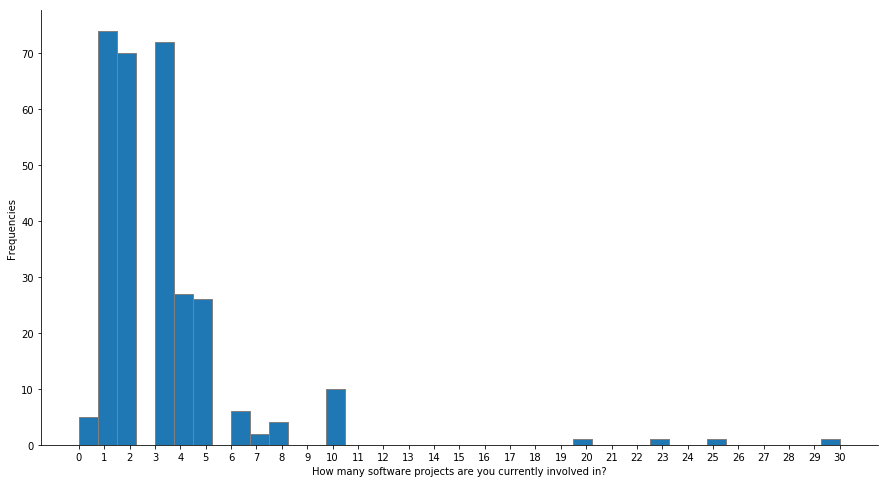

In [141]:
_ = get_plot(v_to_count, "freenumeric")

### How many software developers typically work on your projects?

In [142]:
v_to_count, filename  = get_count(df, ['proj2can. How many software developers typically work on your projects?'], "one choice", "./../survey_creation/2017/de/listAnswers/proj_how_many_de.csv", "True", "./2017/de/output/")

In [143]:
perc_to_count = get_percentage(v_to_count, filename)

In [144]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
How many software developers typically work on ...                   
1                                                     105        35.0
2                                                      97        32.0
3-5                                                    71        24.0
6-9                                                    10         3.0
10+                                                    17         6.0
NaN                                                    25         NaN

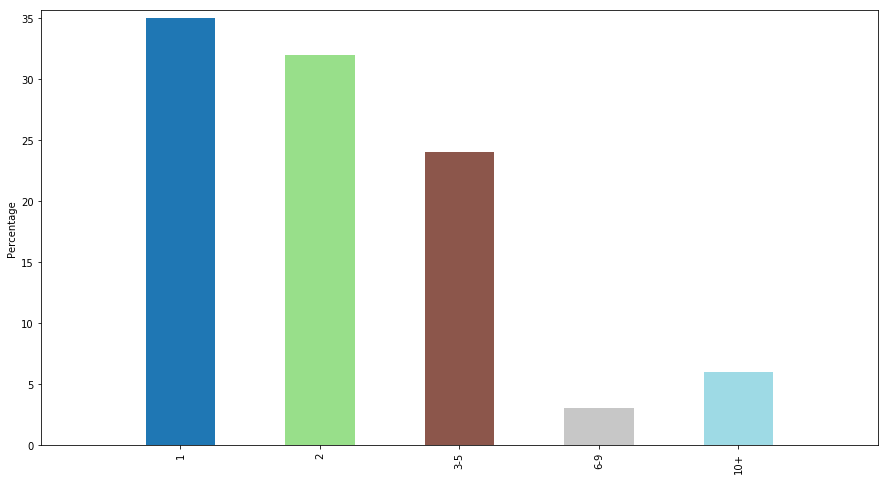

In [145]:
_ = get_plot(perc_to_count, "one choice")

## Training

### Have you ever trained researchers in computational techniques?

In [146]:
v_to_count, filename  = get_count(df, ['train1. Have you ever trained researchers in computational techniques?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [147]:
perc_to_count = get_percentage(v_to_count, filename)

In [148]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever trained researchers in computatio...          197         103   

                                                    NaN value  \
Have you ever trained researchers in computatio...         25   

                                                    Yes [Percentage]  \
Have you ever trained researchers in computatio...              66.0   

                                                    No [Percentage]  
Have you ever trained researchers in computatio...             34.0

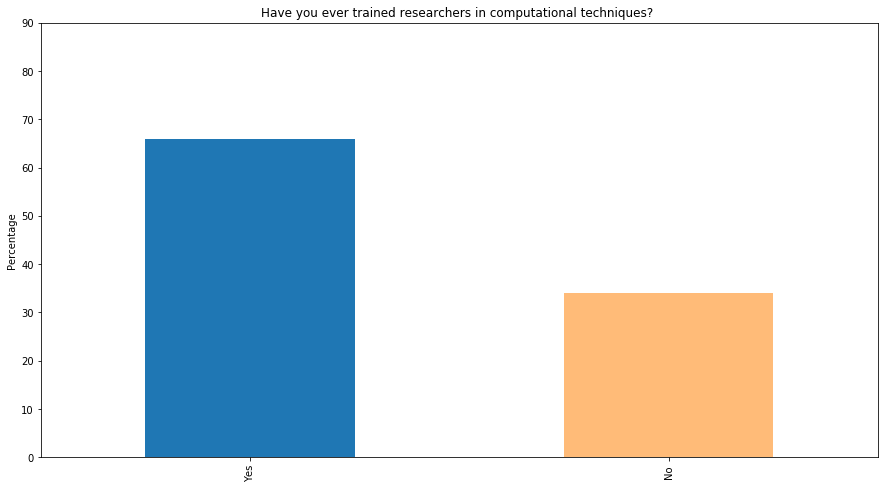

In [149]:
_ = get_plot(perc_to_count, "y/n/na")

### On average, how many times a year do you take part in providing training?

In [150]:
v_to_count, filename  = get_count(df, ['train2. On average, how many times a year do you take part in providing training?'], "freenumeric", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

       On average, how many times a year do you take part in providing training?
count                                         197.000000                        
mean                                            2.776802                        
std                                             6.000172                        
min                                             0.000000                        
25%                                             0.500000                        
50%                                             1.000000                        
75%                                             3.000000                        
max                                            60.000000                        


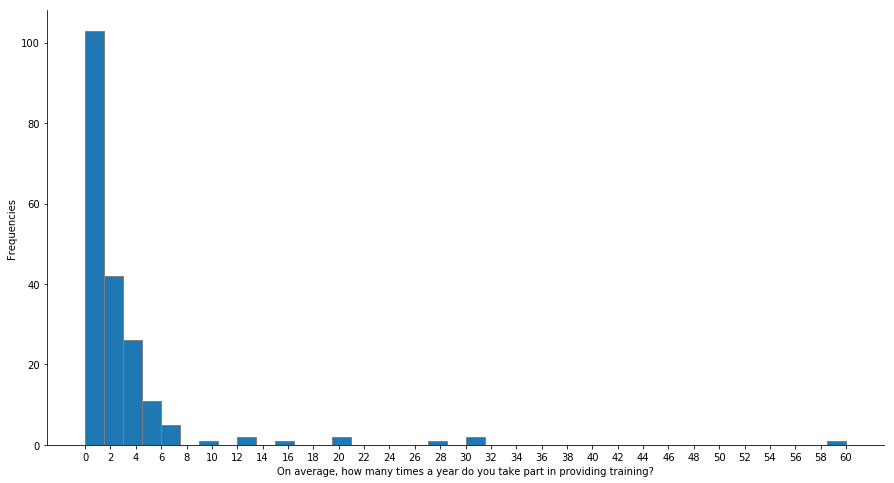

In [151]:
_ = get_plot(v_to_count, "freenumeric")

### What training programs are you involved with (comma separated list; for example, Software Carpentry, local university training, etc.)

In [152]:
 wc = wordcloud(df, ['train3. What training programs are you involved with (comma separated list; for example, Software Carpentry, local university training, etc.)'])

(-0.5, 1499.5, 799.5, -0.5)

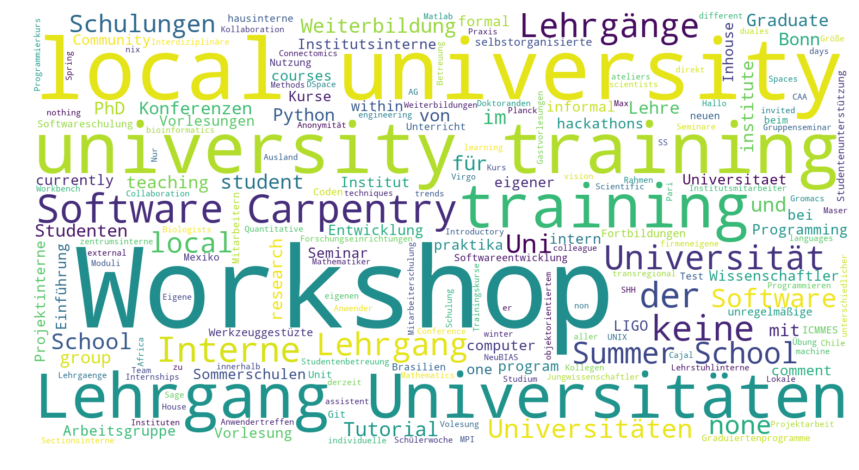

In [153]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Publications

RSEs is an hybrid role between a researcher and a software developer. We investigated both of these aspects concerning publication and dissemination of their work, one on the traditional aspect of it (publications and conference) and on the more software aspect (open source and DOI). 
One essential aspect of career in academia is the publications and the conferences to gain recognition. However, the role of RSE being less about writing articles than creating the infrastructure and the software for the article to exists, there is some fear that they will fail to have recognition through the paper and conference.
Our results support this idea, while for 83% of the participants, their software is used in published researches they are only 71% (among them) who are acknowledged in the publication.

Among these participants, only 33% are generally named as main author for the paper. Among the 67% of those who are not main author, 78% are at least mentioned as co-authors. And among these last 22% of RSEs that are not mentioned as co-author or main author, 69% are at least generally acknowledged in the main text of the paper.
On conference, the number of RSEs that present their work in conference is rather small, only 56%, when compared to the paper publications. 

Software also requires specific citations, and even if the way to do it properly is not standardise yet, it is another way for RSEs to be recognised in their role, but also giving recognition to others that develop software. In that perspective, we asked them *how do they reference software directly or the papers describing the software?*. Among the propositions they could choose, citing the specific version of the software is the most common way to cite it (43%), followed by paper about software or the software itself (32%) or software itself (25%). It is important to note that this question did not have a "No" as an option, therefore these numbers need to be put in perspective of the high number of none answer. Less than 20 % of people chose one of the options. RSEs do not seem to often cite the software they use. 

The other development practice is how the code is distributed and if the RSEs are releasing their work under open licence. 
We asked the participants if they have ever released their work under open source licence and 62% of them replied by the affirmative. However, as it could be considered as a small number, among these 62%, it is seems that the vast majority of them doing it all the time (42%). Therefore, as soon as the step to open source is done, it seems that RSEs seems a constant interest in it. However, they rarely use a Digital Object Identifier (DOI) to help to identify their software. only 18% of them are doing it. And the frequency of use of the DOI among them is much more variable than for the open licence. 
 
A last element about publications is the use of [ORCID](https://orcid.org/). It is an online service that allows to connect different publications and work with one identifier per researcher. Half of them are using the service.


## Academic publications

### Has your software contributed to research that has been published in a journal or at a conference?; In general, when your software contributes to a paper, are you acknowledged in that paper?; Are you generally named as the main author of the paper?; Are you generally named as a co-author of the paper?; Are you generally acknowledged in the main text of the paper?

In [154]:
v_to_count, filename  = get_count(df, ['paper1. Has your software contributed to research that has been published in a journal or at a conference?', 'paper2. In general, when your software contributes to a paper, are you acknowledged in that paper?', 'paper3. Are you generally named as the main author of the paper?', 'paper4. Are you generally named as a co-author of the paper?', 'paper5. Are you generally acknowledged in the main text of the paper?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [155]:
perc_to_count = get_percentage(v_to_count, filename)

In [156]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
paper1. Has your software contributed to resear...          248          52   
paper2. In general, when your software contribu...          212          88   
paper3. Are you generally named as the main aut...           69         143   
paper4. Are you generally named as a co-author ...          111          32   
paper5. Are you generally acknowledged in the m...           22          10   

                                                    NaN value  \
paper1. Has your software contributed to resear...         25   
paper2. In general, when your software contribu...         25   
paper3. Are you generally named as the main aut...        113   
paper4. Are you generally named as a co-author ...        182   
paper5. Are you generally acknowledged in the m...        293   

                                                    Yes [Percentage]  \
paper1. Has your software contributed to resear...              83.0   
paper2. In general, when your software contribu...              71.0   
paper3. Are you generally named as the main aut...              33.0   
paper4. Are you generally named as a co-author ...              78.0   
paper5. Are you generally acknowledged in the m...              69.0   

                                                    No [Percentage]  
paper1. Has your software contributed to resear...             17.0  
paper2. In general, when your software contribu...             29.0  
paper3. Are you generally named as the main aut...             67.0  
paper4. Are you generally named as a co-author ...             22.0  
paper5. Are you generally acknowledged in the m...             31.0

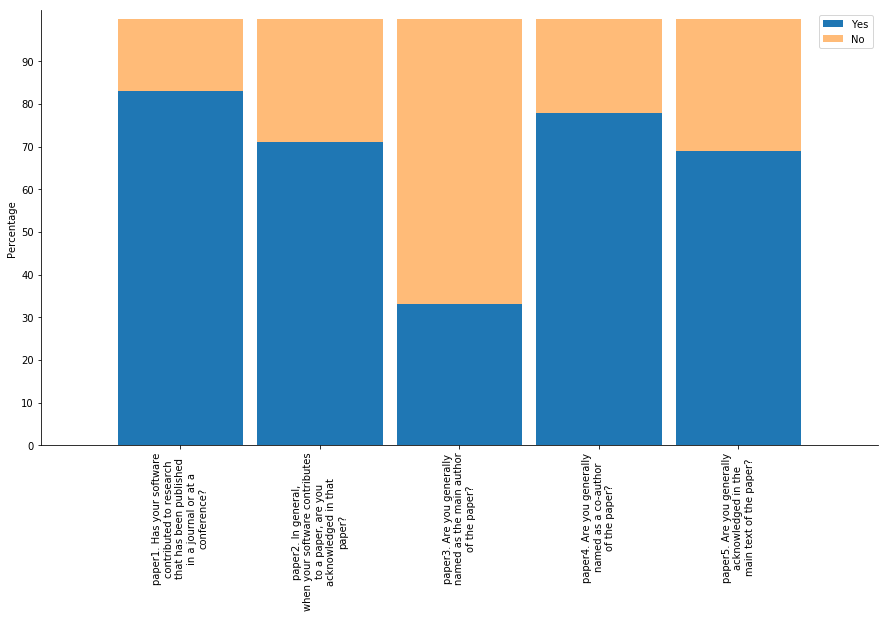

In [157]:
_ = get_plot(perc_to_count, "y/n/na")

### Have you ever presented your software work at a conference or workshop?

In [158]:
v_to_count, filename  = get_count(df, ['conf1can. Have you ever presented your software work at a conference or workshop?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [159]:
perc_to_count = get_percentage(v_to_count, filename)

In [160]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever presented your software work at a...          167         133   

                                                    NaN value  \
Have you ever presented your software work at a...         25   

                                                    Yes [Percentage]  \
Have you ever presented your software work at a...              56.0   

                                                    No [Percentage]  
Have you ever presented your software work at a...             44.0

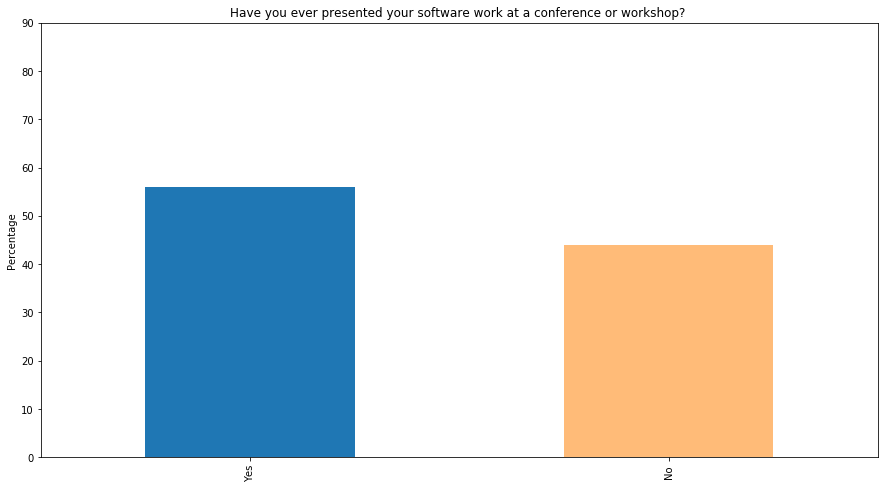

In [161]:
_ = get_plot(perc_to_count, "y/n/na")

### Which conference(s)/workshop(s) (comma separated list with FULLNAME (ACRONYM), ACRONYM, ...)

In [162]:
 wc = wordcloud(df, ['conf2can. Which conference(s)/workshop(s) (comma separated list with FULLNAME (ACRONYM), ACRONYM, ...)'])

(-0.5, 1499.5, 799.5, -0.5)

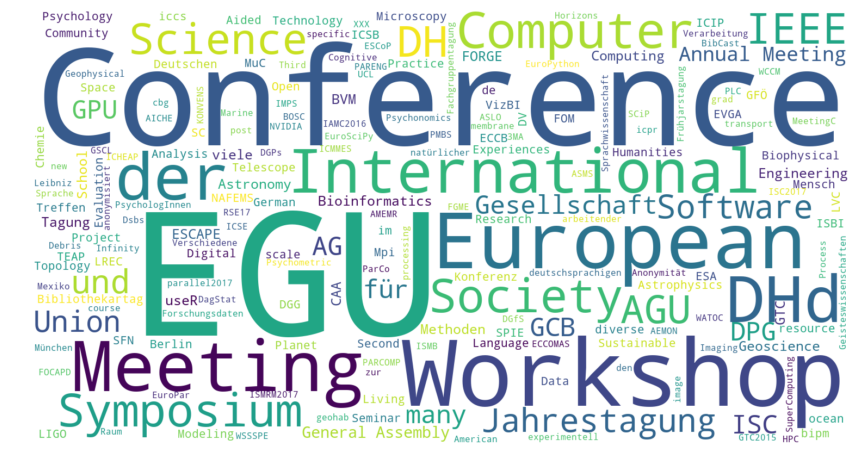

In [163]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Do you reference software directly or the papers describing the software?

In [164]:
v_to_count, filename  = get_count(df, ['open2de. Do you reference software directly or the papers describing the software?'], "one choice", "./../survey_creation/2017/de/listAnswers/doi_topic_de.csv", "False", "./2017/de/output/")

In [165]:
perc_to_count = get_percentage(v_to_count, filename)

In [166]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Do you reference software directly or the paper...                   
specific version of the software                       23        43.0
paper about software                                   17        32.0
software itself (no specific version)                  13        25.0
NaN                                                   272         NaN

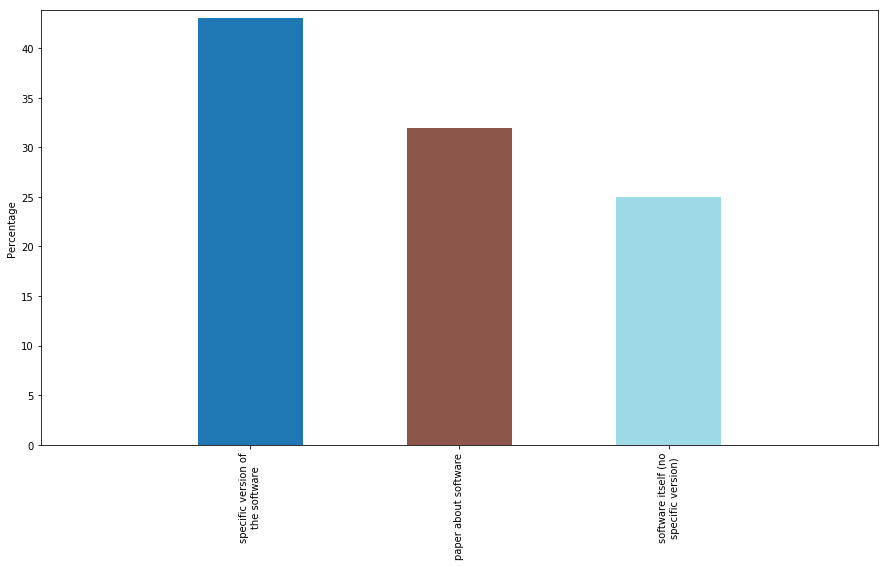

In [167]:
_ = get_plot(perc_to_count, "one choice")

## Open source

### Have you ever released your software under an open-source licence?

In [168]:
v_to_count, filename  = get_count(df, ['open01can. Have you ever released your software under an open-source licence?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [169]:
perc_to_count = get_percentage(v_to_count, filename)

In [170]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever released your software under an o...          187         113   

                                                    NaN value  \
Have you ever released your software under an o...         25   

                                                    Yes [Percentage]  \
Have you ever released your software under an o...              62.0   

                                                    No [Percentage]  
Have you ever released your software under an o...             38.0

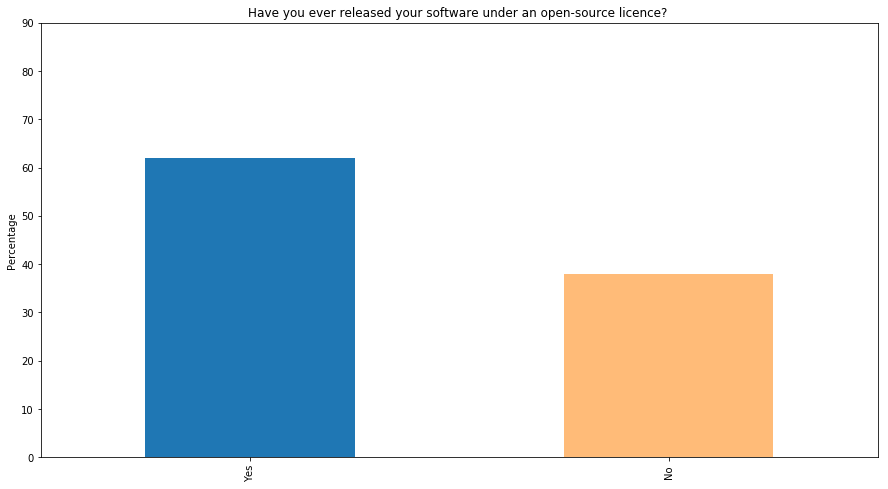

In [171]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you release the software projects you've worked on under an open-source licence?

In [172]:
v_to_count, filename  = get_count(df, ["open1can[SQ001]. How often do you release the software projects you've worked on under an open-source licence? []"], "one choice", "./../survey_creation/2017/de/listAnswers/likert_time_10.csv", "True", "./2017/de/output/")

In [173]:
perc_to_count = get_percentage(v_to_count, filename)

In [174]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
How often do you release the software projects ...                   
2                                                      13         7.0
3                                                       8         4.0
4                                                       2         1.0
5                                                      25        13.0
6                                                      11         6.0
7                                                      15         8.0
8                                                      16         9.0
9                                                      19        10.0
10 (All my time)                                       78        42.0
NaN                                                   138         NaN

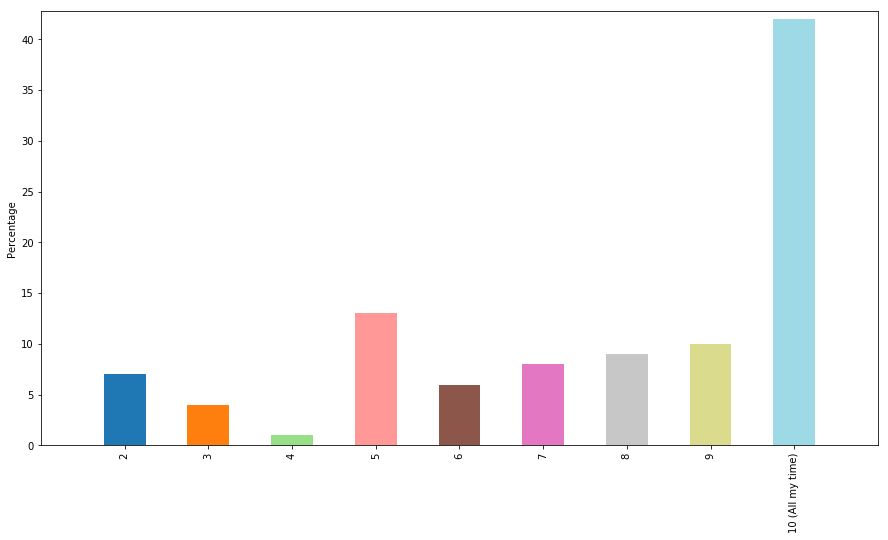

In [175]:
_ = get_plot(perc_to_count, "one choice")

### Have you ever used a Digital Object Identifier (DOI) to identify your software?

In [176]:
v_to_count, filename  = get_count(df, ['open03can. Have you ever used a Digital Object Identifier (DOI) to identify your software?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [177]:
perc_to_count = get_percentage(v_to_count, filename)

In [178]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever used a Digital Object Identifier ...           53         247   

                                                    NaN value  \
Have you ever used a Digital Object Identifier ...         25   

                                                    Yes [Percentage]  \
Have you ever used a Digital Object Identifier ...              18.0   

                                                    No [Percentage]  
Have you ever used a Digital Object Identifier ...             82.0

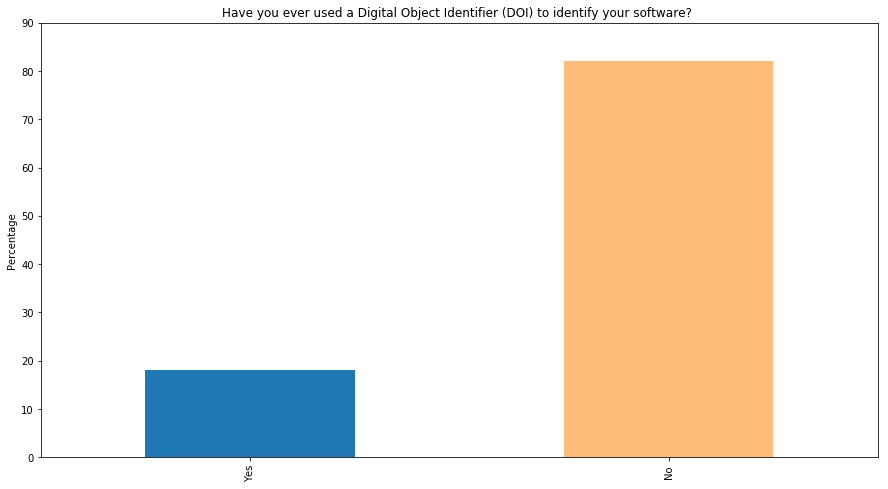

In [179]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you associate your software with a Digital Object Identifier (DOI)?

In [180]:
v_to_count, filename  = get_count(df, ['open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []'], "one choice", "./../survey_creation/2017/de/listAnswers/likert_time_10.csv", "True", "./2017/de/output/")

In [181]:
perc_to_count = get_percentage(v_to_count, filename)

In [182]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
How often do you associate your software with a...                   
﻿1 (None at all)                                        2         4.0
2                                                       6        11.0
3                                                       7        13.0
4                                                       1         2.0
5                                                      10        19.0
6                                                       4         8.0
7                                                       7        13.0
8                                                       4         8.0
9                                                       1         2.0
10 (All my time)                                       11        21.0
NaN                                                   272         NaN

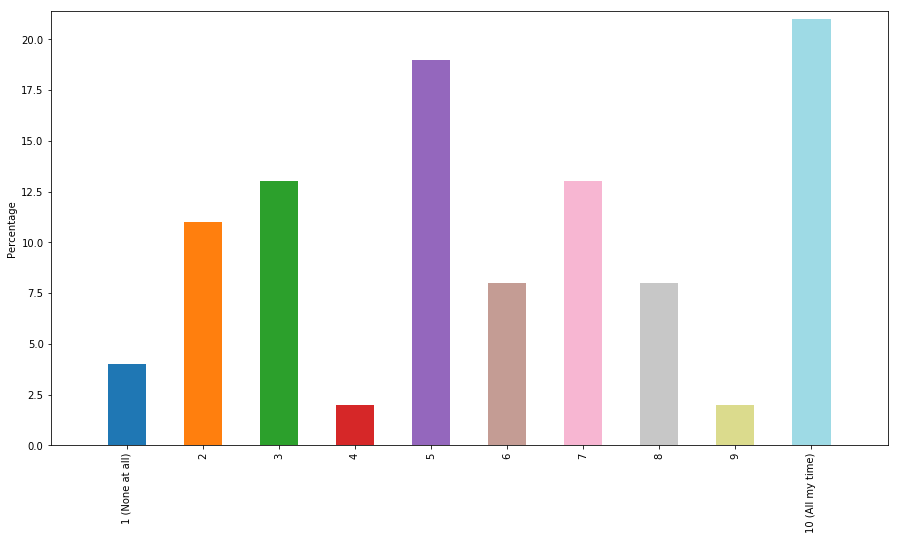

In [183]:
_ = get_plot(perc_to_count, "one choice")

### Which (infrastructure) tools do you use if assigning DOIs (e.g. local library, Zenodo)?

In [184]:
 wc = wordcloud(df, ['open3de. Which (infrastructure) tools do you use if assigning DOIs (e.g. local library, Zenodo)?'])

(-0.5, 1499.5, 799.5, -0.5)

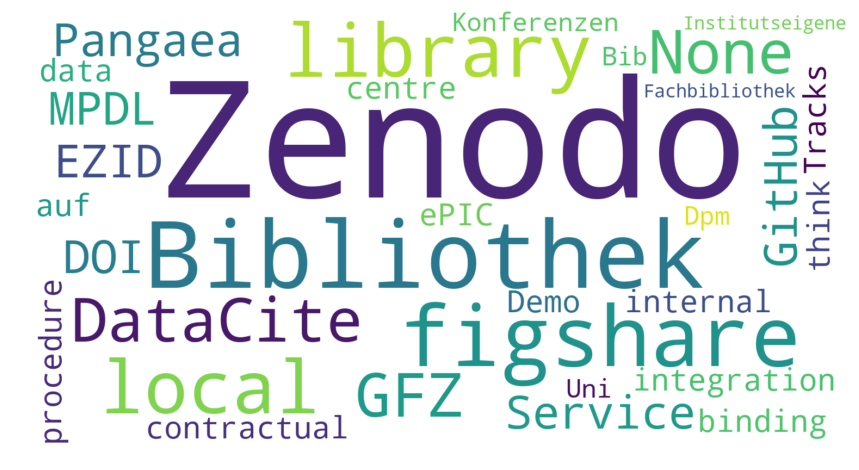

In [185]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Do you have an ORCID ID?

In [186]:
v_to_count, filename  = get_count(df, ['open1de. Do you have an ORCID ID?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [187]:
perc_to_count = get_percentage(v_to_count, filename)

In [188]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  NaN value  \
Do you have an ORCID ID?          150         150         25   

                          Yes [Percentage]  No [Percentage]  
Do you have an ORCID ID?              50.0             50.0

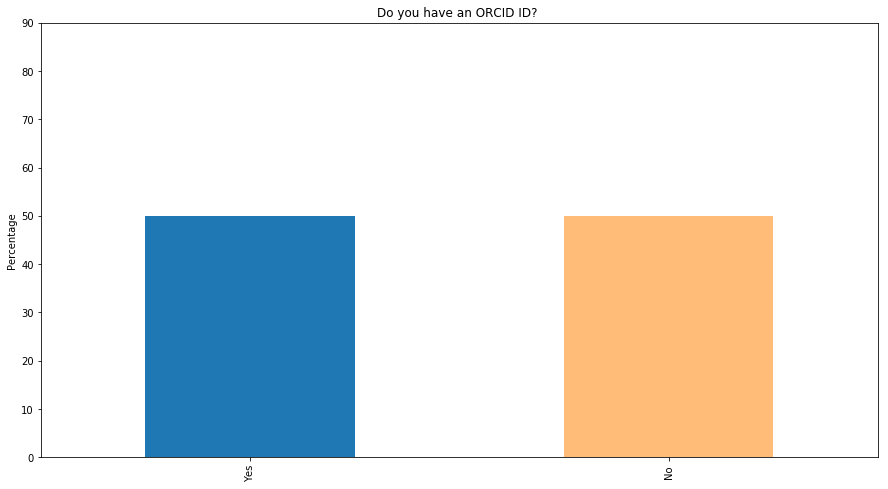

In [189]:
_ = get_plot(perc_to_count, "y/n/na")

# Sustainability and technical details

This section comprises two subsections that focus on the technical and development aspects of the RSEs' work. They aim to understand good practices in developing software and which tools are important for for RSEs. 

Developing software requires a set of good practices to ensure the quality of the subsequents analysis as well as the robustness of the developped sofware, to name a few of important aspects. We wanted to see if the implementation of some simple but essential good practices were a reality. Three measures were created, the implementation of testing, the bus factor and the technical hand over plan.
These metrics allows to see the importance of the RSEs role in their team but also if they are themselves implementing some practices that are used widely in industry but less in academic research.

We asked the participants to choose any of the following testing methods:
* Test engineers conduct testing
* Developers conduct testing
* Users conduct testing
* No formal testing

Obviously, the *test engineers conduct testing* is the most potential testing method but may not be possible in number of small projects while, no formal testing should not occur in any ideal scenario, regardless of the size of the project. Surprisingly, 15% of the participants confessed they were not implementing testing at all. It may seems a low number but we think it is still a high percentage considering the specific work of this population. When they are conducting testing, the RSEs seems to prefer (or only able to implement) *developer testing* (48% of them) or letting the users conduct the testing (33%), while the use of test engineers is marginal (4%).

We chose two broad measures to provide an insight into sustainability: the bus factor and technical hand over planning. The bus factor is a measure of the number of developers who understand a specific software project and could, with only a cursory review of the project, maintain or extend the code. A project with a bus factor of 1 is completely reliant on only one developer. If this developer finds new employment, becomes ill or is hit by the titular bus, then the project will fail. A high bus factor provides some confidence that the project can be sustained even if a developer leaves. A technical hand over plan is used to introduce a new developer to a software project. These plans cover basic information, such as the licence and location of the software, a repository, a description of the software architecture, a summary of development plans and any other information that a new developer would need to understand the software. A project that has written (and maintained) a technical hand over plan can withstand the departure of a developer, even a key developer, significantly better than one without such a plan.

On majority of the RSEs' projects the bus factor is 1 (57%), followed by a bus factor of 2 (27%). Higher bus factor is only marginal with only 8% of the projects having a bus factor of 3, 3% of a bus factor of 4 and 5 % a bus factor equal or higher than 5.
These low numbers should be put in relation of the number of developer involved in the project (35 % of the projects with only one developer and 32 % with 2 developers). However, the presence of a technical plan, which can mitigate the low bus factor in the different projects is really low (19%) and presents a risk of project failures.


On technical details we wanted to know which of the programming languages were mostly used by the RSEs. We give them a multi-choice list inspired by the [results](https://insights.stackoverflow.com/survey/2017#most-popular-technologies) published by Stackoverflow. Python and C++ are clearly the most used language with 18% and 10%. The rests of the languages that are higher than 5% are Javascript (9%), R (8%), C (8%), Java (7%), Matlab (7%), SQL (7%) and Fortran (6%).
About which Operating System used by RSEs, a majority are using GNU/Linux (60%), while Windows and OS X have way less users (23 and 15%).

## Good practices

### In general, what sort of testing do you conduct on your software? (check all that apply)

In [190]:
v_to_count, filename  = get_count(df, ['proj4can[1]. In general, what sort of testing do you conduct on your software? (check all that apply) [No formal testing]', 'proj4can[2]. In general, what sort of testing do you conduct on your software? (check all that apply) [Developers conduct testing]', 'proj4can[3]. In general, what sort of testing do you conduct on your software? (check all that apply) [Test engineers conduct testing]', 'proj4can[4]. In general, what sort of testing do you conduct on your software? (check all that apply) [Users conduct testing]'], "multiple choices", "./../survey_creation/2017/de/listAnswers/testing.csv", "False", "./2017/de/output/")

In [191]:
perc_to_count = get_percentage(v_to_count, filename)

In [192]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                 
Developers conduct testing        263        48.0
Users conduct testing             182        33.0
No formal testing                  82        15.0
Test engineers conduct testing     20         4.0

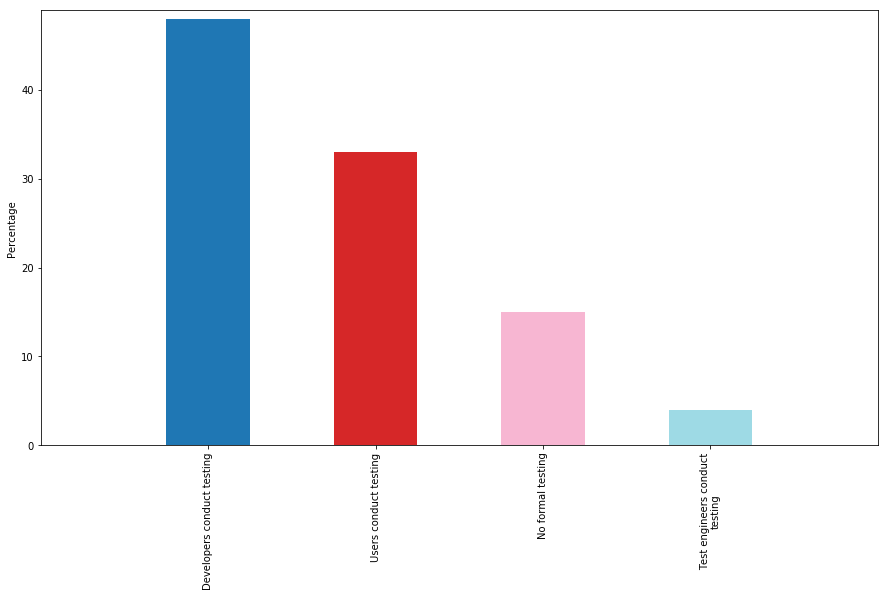

In [193]:
_ = get_plot(perc_to_count, "multiple choices")

### What is the bus factor of your most important software project?

In [194]:
v_to_count, filename  = get_count(df, ['stability1. What is the bus factor of your most important software project?'], "one choice", "./../survey_creation/2017/de/listAnswers/bus_factor.csv", "True", "./2017/de/output/")

In [195]:
perc_to_count = get_percentage(v_to_count, filename)

In [196]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What is the bus factor of your most important s...                   
1                                                     172        57.0
2                                                      80        27.0
3                                                      23         8.0
4                                                       9         3.0
5+                                                     16         5.0
NaN                                                    25         NaN

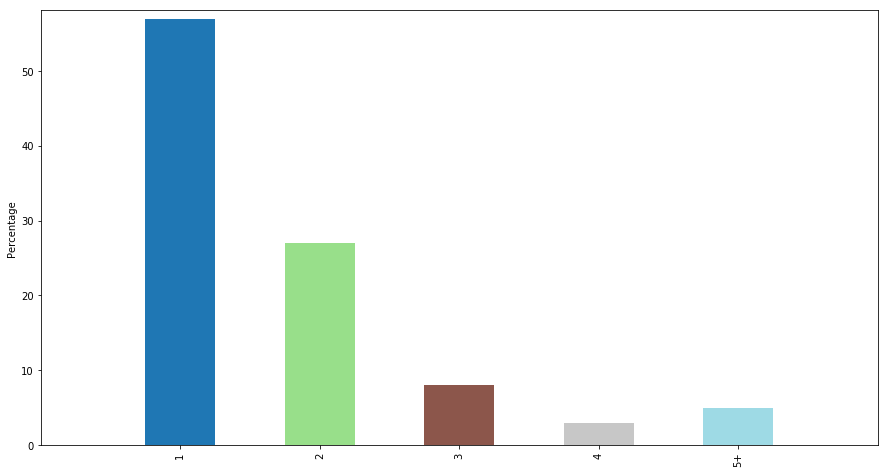

In [197]:
_ = get_plot(perc_to_count, "one choice")

### Is there a technical hand-over plan for your most important software project?

In [198]:
v_to_count, filename  = get_count(df, ['stability2. Is there a technical hand-over plan for your most important software project?'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [199]:
perc_to_count = get_percentage(v_to_count, filename)

In [200]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Is there a technical hand-over plan for your mo...           56         244   

                                                    NaN value  \
Is there a technical hand-over plan for your mo...         25   

                                                    Yes [Percentage]  \
Is there a technical hand-over plan for your mo...              19.0   

                                                    No [Percentage]  
Is there a technical hand-over plan for your mo...             81.0

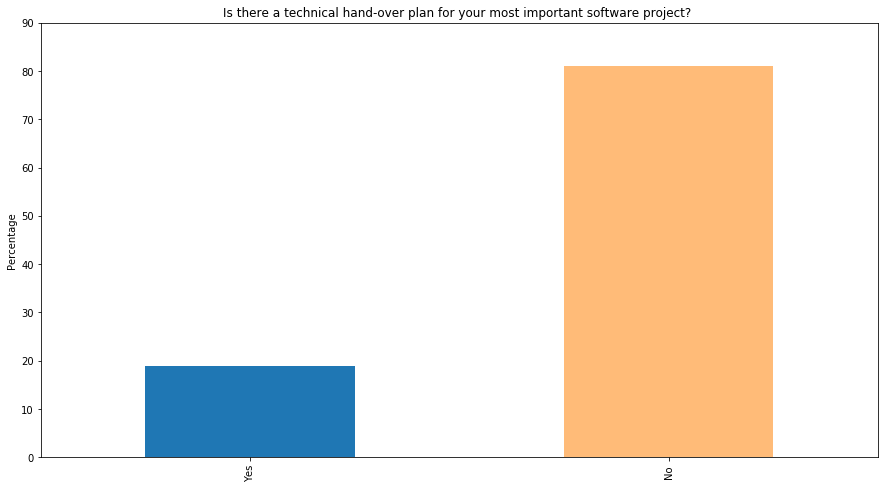

In [201]:
_ = get_plot(perc_to_count, "y/n/na")

## Technical details

### What programming languages do you use at work? (Select as many as apply)

In [202]:
v_to_count, filename  = get_count(df, ['tool4can[1]. What programming languages do you use at work? (Select as many as apply) [Assembly]', 'tool4can[2]. What programming languages do you use at work? (Select as many as apply) [C]', 'tool4can[3]. What programming languages do you use at work? (Select as many as apply) [C#]', 'tool4can[4]. What programming languages do you use at work? (Select as many as apply) [C++]', 'tool4can[5]. What programming languages do you use at work? (Select as many as apply) [Clojure]', 'tool4can[6]. What programming languages do you use at work? (Select as many as apply) [CoffeeScript]', 'tool4can[7]. What programming languages do you use at work? (Select as many as apply) [Common Lisp]', 'tool4can[8]. What programming languages do you use at work? (Select as many as apply) [Dart]', 'tool4can[9]. What programming languages do you use at work? (Select as many as apply) [Elixir]', 'tool4can[10]. What programming languages do you use at work? (Select as many as apply) [Erlang]', 'tool4can[11]. What programming languages do you use at work? (Select as many as apply) [F#]', 'tool4can[12]. What programming languages do you use at work? (Select as many as apply) [Fortran]', 'tool4can[13]. What programming languages do you use at work? (Select as many as apply) [Go]', 'tool4can[14]. What programming languages do you use at work? (Select as many as apply) [Groovy]', 'tool4can[15]. What programming languages do you use at work? (Select as many as apply) [Hack]', 'tool4can[16]. What programming languages do you use at work? (Select as many as apply) [Haskell]', 'tool4can[17]. What programming languages do you use at work? (Select as many as apply) [Java]', 'tool4can[18]. What programming languages do you use at work? (Select as many as apply) [JavaScript]', 'tool4can[19]. What programming languages do you use at work? (Select as many as apply) [Julia]', 'tool4can[20]. What programming languages do you use at work? (Select as many as apply) [Lua]', 'tool4can[21]. What programming languages do you use at work? (Select as many as apply) [Matlab]', 'tool4can[22]. What programming languages do you use at work? (Select as many as apply) [Objective-C]', 'tool4can[23]. What programming languages do you use at work? (Select as many as apply) [Perl]', 'tool4can[24]. What programming languages do you use at work? (Select as many as apply) [PHP]', 'tool4can[25]. What programming languages do you use at work? (Select as many as apply) [Python]', 'tool4can[26]. What programming languages do you use at work? (Select as many as apply) [R]', 'tool4can[27]. What programming languages do you use at work? (Select as many as apply) [Ruby]', 'tool4can[28]. What programming languages do you use at work? (Select as many as apply) [Rust]', 'tool4can[29]. What programming languages do you use at work? (Select as many as apply) [Scala]', 'tool4can[30]. What programming languages do you use at work? (Select as many as apply) [Smalltalk]', 'tool4can[31]. What programming languages do you use at work? (Select as many as apply) [SQL]', 'tool4can[32]. What programming languages do you use at work? (Select as many as apply) [Swift]', 'tool4can[33]. What programming languages do you use at work? (Select as many as apply) [TypeScript]', 'tool4can[34]. What programming languages do you use at work? (Select as many as apply) [VB.NET]', 'tool4can[35]. What programming languages do you use at work? (Select as many as apply) [VBA]', 'tool4can[36]. What programming languages do you use at work? (Select as many as apply) [Visual Basic]'], "multiple choices", "./../survey_creation/2017/de/listAnswers/programing_language.csv", "False", "./2017/de/output/")

In [203]:
perc_to_count = get_percentage(v_to_count, filename)

In [204]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                               
Python          175        18.0
C++              99        10.0
JavaScript       86         9.0
R                75         8.0
C                73         8.0
Java             69         7.0
Matlab           67         7.0
SQL              64         7.0
Fortran          61         6.0
PHP              41         4.0
Perl             33         3.0
C#               14         1.0
VBA              13         1.0
Ruby             13         1.0
Julia            12         1.0
Assembly         10         1.0
Visual Basic      8         1.0
Lua               8         1.0
TypeScript        5         1.0
Groovy            4         0.0
Go                4         0.0
VB.NET            4         0.0
Scala             3         0.0
Haskell           3         0.0
Rust              2         0.0
CoffeeScript      2         0.0
Swift             2         0.0
Objective-C       2         0.0
Clojure           1         0.0
Common Lisp       1         0.0
Elixir            0         0.0
Dart              0         0.0
Hack              0         0.0
Erlang            0         0.0
Smalltalk         0         0.0
F#                0         0.0

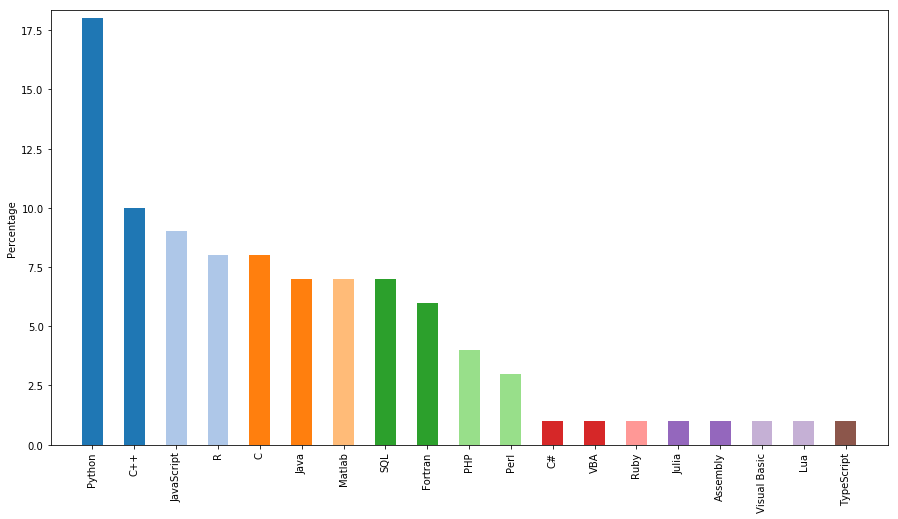

In [205]:
_ = get_plot(perc_to_count, "multiple choices")

### What Operating System do you prefer to use at work?

In [206]:
v_to_count, filename  = get_count(df, ['tool2. What Operating System do you prefer to use at work?'], "one choice", "./../survey_creation/2017/de/listAnswers/os.csv", "False", "./2017/de/output/")

In [207]:
perc_to_count = get_percentage(v_to_count, filename)

In [208]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What Operating System do you prefer to use at w...                   
GNU/Linux                                             149        60.0
Windows                                                56        23.0
OS X                                                   37        15.0
Other                                                   6         2.0
NaN                                                    77         NaN

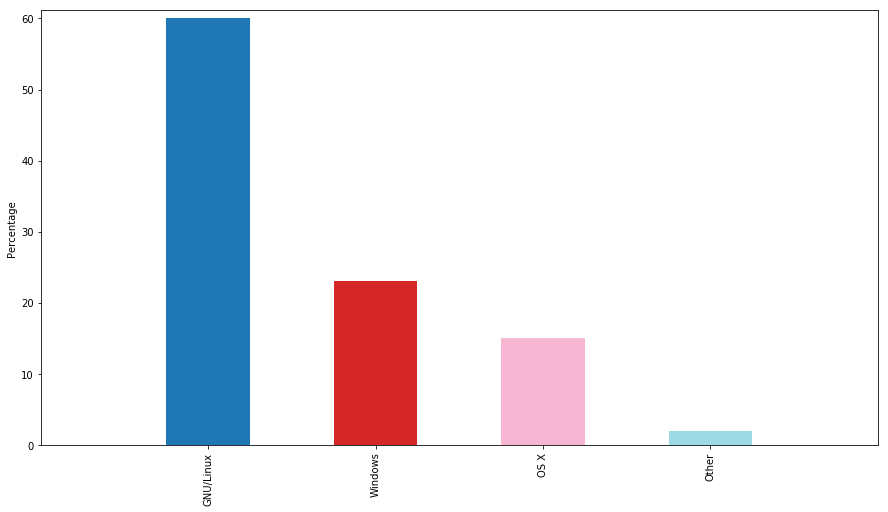

In [209]:
_ = get_plot(perc_to_count, "one choice")

# Job satisfaction

The job satisfaction is an essential pulse to take about the community. It helps to track the evolution and the current state of the RSEs within their role and to catch any sign of structural or organisational dysfunction that are translated into well-being. There are a lot of different metrics to measure the quality of a job on a personal and psychological level [4]. Several models exist to understand the link between different factors of job satisfaction and turnover intention [5]–[9]. Turnover intention is an important measure that is highly associated with the risk of employees leaving the organisation [7]. Job satisfaction is important in retaining RSEs. Perceived employability provides information on how workers values their own skills in regard of the market. To measure the different attitudes toward the RSE role, we used scales that have been created in [5], [6], [8], [9]. These are Likert scale [10], which are 5 point ordinal scales graduated from Strongly disagree to Strongly agree. Each scale is composed of several so called items (i.e. questions) that each measure one attitude.

Beside these specific concepts we asked more general question about their satisfaction in their current position and their satisfaction with their career in general. To the range from *0 - Not at all satisfied* to *10 - Completely satisfied*, 79% of the participants answered more than 5 to the scale (which can be considered as a neutral position) to the question about their satisfaction about their current position. For the question about their satisfaction with their career in general (and using the same scale), 71% of the participants answered more than 5 to the scale. 

The specific questions about their job satisfaction reflect, in general, the same opinion as the two more generic questions. However, the granularity helps to identify a couple of issues that would not appears with generic questions:
* *The feedback about the performance*: These questions ask if the RSEs feel that they receive enough information about their work and their performance. While they seems to have enough information about the purpose of their work and having access to sufficient data and information, they are less assertive about the feedback they receive from their colleagues and their supervisors. 
* *The turnover intention*: These questions aim to measure the desire to quit their current position. Overall, the participants are not willing to leave their position and are not necessarily searching for other job, even if the potential job would offer the same compensations.  
* *The perceived employability*: This concept is linked to the previous one. People may not have the intention to leave their jobs, not because they like it, but because they fear they are not employable. This is not the case here, the participants consider themselves more often employable than not. 
* *The affective recognition*: This concept try to see if the participants receive positive feedback from their supervisors. Overall, again the participants report a positive relation with their supervisors. It means they are not systematic issues with direct management. 

* *Affective satisfaction*: Here, the concept measures how much the participants enjoy and like their job. The answers were positive and again, reflect the answers given at the more generic questions. 

* *The possibility of progression*: This question aims to study the possibility of evolution for the RSEs, if information is available and if they see a possibility of evolution within their current career. This is the only questions that clearly received negatives answers. To summarise, even if the RSEs have planned to be in this position, as a part of their career plan, the majority of them think they cannot be promoted in their current group, neither the information for such progression is easily accessible.

### In general, how satisfied are you with Your current position; In general, how satisfied are you with Your career

In [210]:
v_to_count, filename  = get_count(df, ['likert3[satisgen1]. [In general, how satisfied are you with Your current position]', 'likert3[satisgen2]. [In general, how satisfied are you with Your career]'], "likert", "./../survey_creation/2017/de/listAnswers/likert_satisfied_10.csv", "False", "./2017/de/output/")

In [211]:
perc_to_count = get_percentage(v_to_count, filename)

In [212]:
display_side_by_side(v_to_count, perc_to_count)

﻿0 - Not at all satisfied [Count]  \
In general, how satisfied are you with Your cur...                                  3   
In general, how satisfied are you with Your career                                  4   

                                                    1 [Count]  2 [Count]  \
In general, how satisfied are you with Your cur...          3          9   
In general, how satisfied are you with Your career          4         11   

                                                    3 [Count]  4 [Count]  \
In general, how satisfied are you with Your cur...         10         10   
In general, how satisfied are you with Your career         16         16   

                                                    5 [Count]  6 [Count]  \
In general, how satisfied are you with Your cur...         20         39   
In general, how satisfied are you with Your career         25         38   

                                                    7 [Count]  8 [Count]  \
In general, how satisfied are you with Your cur...         48         79   
In general, how satisfied are you with Your career         58         55   

                                                    9 [Count]  \
In general, how satisfied are you with Your cur...         31   
In general, how satisfied are you with Your career         28   

                                                    10 - Completely satisfied [Count]  \
In general, how satisfied are you with Your cur...                                 17   
In general, how satisfied are you with Your career                                 14   

                                                    ﻿0 - Not at all satisfied [Percentage]  \
In general, how satisfied are you with Your cur...                                     1.0   
In general, how satisfied are you with Your career                                     1.0   

                                                    1 [Percentage]  \
In general, how satisfied are you with Your cur...             1.0   
In general, how satisfied are you with Your career             1.0   

                                                    2 [Percentage]  \
In general, how satisfied are you with Your cur...             3.0   
In general, how satisfied are you with Your career             4.0   

                                                    3 [Percentage]  \
In general, how satisfied are you with Your cur...             4.0   
In general, how satisfied are you with Your career             6.0   

                                                    4 [Percentage]  \
In general, how satisfied are you with Your cur...             4.0   
In general, how satisfied are you with Your career             6.0   

                                                    5 [Percentage]  \
In general, how satisfied are you with Your cur...             7.0   
In general, how satisfied are you with Your career             9.0   

                                                    6 [Percentage]  \
In general, how satisfied are you with Your cur...            14.0   
In general, how satisfied are you with Your career            14.0   

                                                    7 [Percentage]  \
In general, how satisfied are you with Your cur...            18.0   
In general, how satisfied are you with Your career            22.0   

                                                    8 [Percentage]  \
In general, how satisfied are you with Your cur...            29.0   
In general, how satisfied are you with Your career            20.0   

                                                    9 [Percentage]  \
In general, how satisfied are you with Your cur...            12.0   
In general, how satisfied are you with Your career            10.0   

                                                    10 - Completely satisfied [Percentage]  
In general, how satisfied are you with Your cur...                                     6.0  
In general, how satisfied are you wi

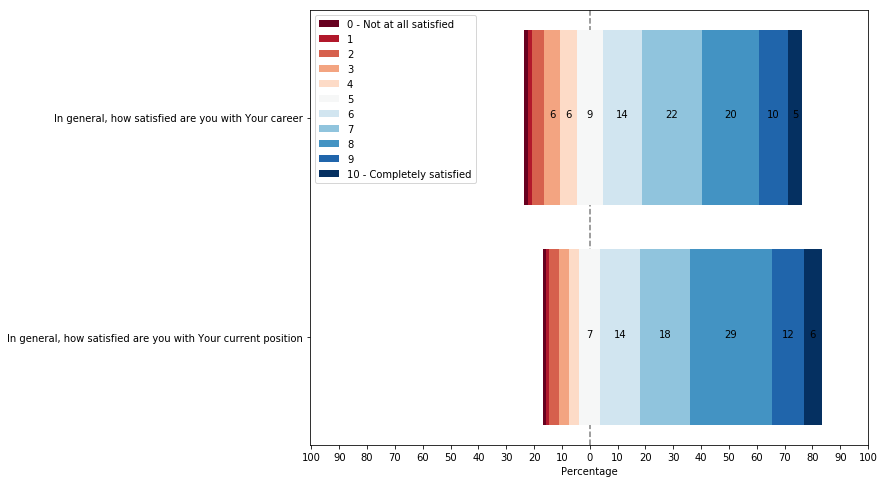

In [213]:
_ = get_plot(v_to_count, "likert")

### Do you receive sufficient information on the results of your work?; Does your work give you the opportunity to check on how well you are doing your work?; In your work, do you have access to sufficient data and information?; Do you receive sufficient information on the purpose of your work?; Does your work provide you with direct feedback on how well you are doing your work?; Does your supervisor/line manager inform you about how well you are doing your work?; Do your colleagues inform you about how well you are doing your work?

In [214]:
v_to_count, filename  = get_count(df, ['likert1[perfCheck1]. [Do you receive sufficient information on the results of your work?]', 'likert1[perfCheck2]. [Does your work give you the opportunity to check on how well you are doing your work?]', 'likert1[perfCheck3]. [In your work, do you have access to sufficient data and information?]', 'likert1[perfCheck4]. [Do you receive sufficient information on the purpose of your work?]', 'likert1[perfCheck5]. [Does your work provide you with direct feedback on how well you are doing your work?]', 'likert1[perfCheck6]. [Does your supervisor/line manager inform you about how well you are doing your work?]', 'likert1[perfCheck7]. [Do your colleagues inform you about how well you are doing your work?]'], "likert", "./../survey_creation/2017/de/listAnswers/likert_time_10.csv", "False", "./2017/de/output/")

In [215]:
display(v_to_count) 

﻿1 (None at all)   2   3  \
Do you receive sufficient information on the re...                 3   9  22   
Does your work give you the opportunity to chec...                10  22  22   
In your work, do you have access to sufficient ...                 2   9   8   
Do you receive sufficient information on the pu...                 6   5   7   
Does your work provide you with direct feedback...                 8  24  29   
Does your supervisor/line manager inform you ab...                25  19  29   
Do your colleagues inform you about how well yo...                13  27  25   

                                                     4   5   6   7   8   9  \
Do you receive sufficient information on the re...  14  21  24  41  55  41   
Does your work give you the opportunity to chec...  28  33  32  47  36  18   
In your work, do you have access to sufficient ...   9  15  18  43  68  56   
Do you receive sufficient information on the pu...   5  15  16  34  49  73   
Does your work provide you with direct feedback...  28  19  28  43  51  25   
Does your supervisor/line manager inform you ab...  19  34  32  30  34  27   
Do your colleagues inform you about how well yo...  20  34  34  44  32  27   

                                                    10 (All my time)  
Do you receive sufficient information on the re...                42  
Does your work give you the opportunity to chec...                23  
In your work, do you have access to sufficient ...                43  
Do you receive sufficient information on the pu...                61  
Does your work provide you with direct feedback...                17  
Does your supervisor/line manager inform you ab...                22  
Do your colleagues inform you about how well yo...                15

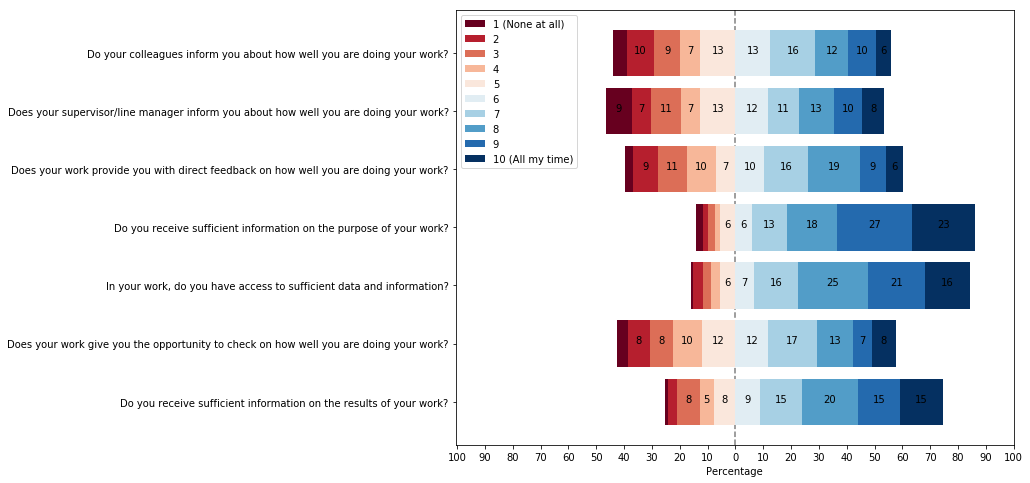

In [216]:
_ = get_plot(v_to_count, "likert")

### How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?; How often do you look forward to another day at work?; How often do you consider leaving your job?; How often do dream about getting another job that will better suit your needs?

In [217]:
v_to_count, filename  = get_count(df, ['likert1[turnOver1]. [How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?]', 'likert1[turnOver2]. [How often do you look forward to another day at work?]', 'likert1[turnOver3]. [How often do you consider leaving your job?]', 'likert1[turnOver4]. [How often do dream about getting another job that will better suit your needs?]'], "likert", "./../survey_creation/2017/de/listAnswers/likert_time_10.csv", "False", "./2017/de/output/")

In [218]:
display(v_to_count) 

﻿1 (None at all)   2   3  \
How often do you feel frustrated when not given...                21  35  37   
How often do you look forward to another day at...                 7   2   9   
How often do you consider leaving your job?                       55  63  40   
How often do dream about getting another job th...                46  48  35   

                                                     4   5   6   7   8   9  \
How often do you feel frustrated when not given...  32  37  31  26  25  18   
How often do you look forward to another day at...  18  27  33  44  61  47   
How often do you consider leaving your job?         18  18  13  20  23  12   
How often do dream about getting another job th...  18  20  22  31  20  14   

                                                    10 (All my time)  
How often do you feel frustrated when not given...                 9  
How often do you look forward to another day at...                23  
How often do you consider leaving your job?                        9  
How often do dream about getting another job th...                17

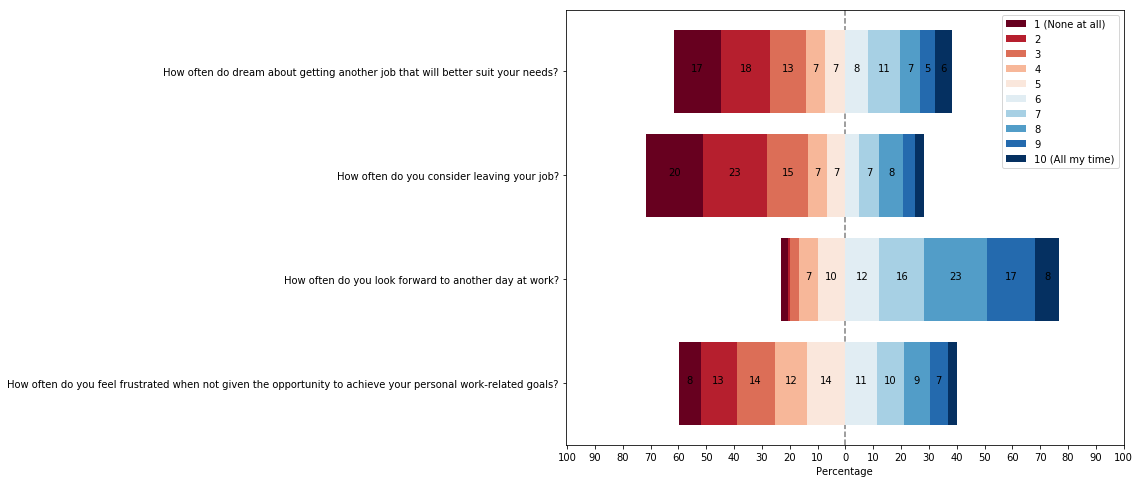

In [219]:
_ = get_plot(v_to_count, "likert")

### My current job satisfies my personal needs; I would accept another job at the same compensation level if I was offered it

In [220]:
v_to_count, filename  = get_count(df, ['likert2[turnOver5]. [My current job satisfies my personal needs]', 'likert2[turnOver6]. [I would accept another job at the same compensation level if I was offered it]'], "likert", "./../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./2017/de/output/")

In [221]:
display(v_to_count) 

Strongly disagree  \
My current job satisfies my personal needs                         11   
I would accept another job at the same compensa...                 76   

                                                    Disagree  \
My current job satisfies my personal needs                47   
I would accept another job at the same compensa...        79   

                                                    Neither agree or disagree  \
My current job satisfies my personal needs                                 58   
I would accept another job at the same compensa...                         61   

                                                    Agree  Strongly Agree  
My current job satisfies my personal needs            115              38  
I would accept another job at the same compensa...     42              11

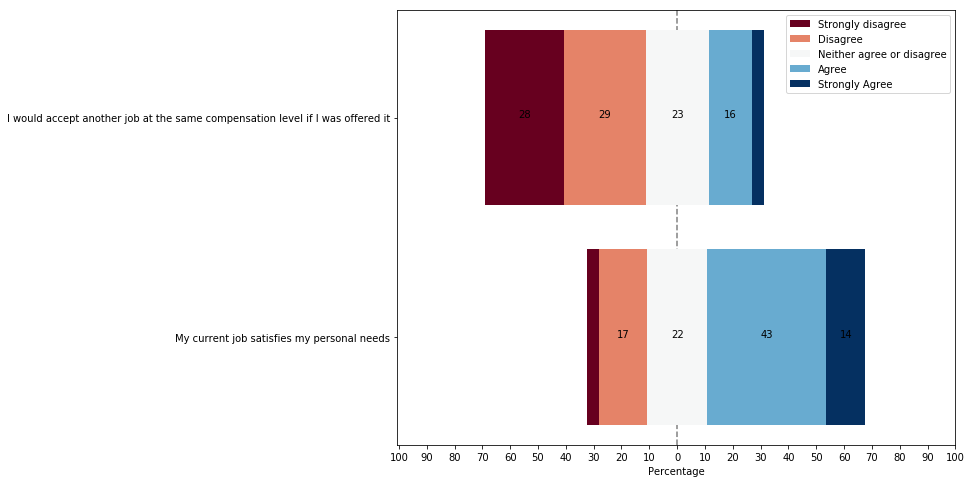

In [222]:
_ = get_plot(v_to_count, "likert")

### It would not be very difficult for me to get an equivalent job in a different organisation; I can think of a number of organisations that would probably offer me a job; My experience is in demand on the labour market; Given my qualifications and experience, getting a new job would not be very hard at all

In [223]:
v_to_count, filename  = get_count(df, ['likert2[percEmp1]. [It would not be very difficult for me to get an equivalent job in a different organisation]', 'likert2[percEmp2]. [I can think of a number of organisations that would probably offer me a job]', 'likert2[percEmp3]. [My experience is in demand on the labour market]', 'likert2[percEmp4]. [Given my qualifications and experience, getting a new job would not be very hard at all]'], "likert", "./../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./2017/de/output/")

In [224]:
display(v_to_count) 

Strongly disagree  \
It would not be very difficult for me to get an...                 17   
I can think of a number of organisations that w...                 25   
My experience is in demand on the labour market                     9   
Given my qualifications and experience, getting...                 21   

                                                    Disagree  \
It would not be very difficult for me to get an...        37   
I can think of a number of organisations that w...        41   
My experience is in demand on the labour market           22   
Given my qualifications and experience, getting...        31   

                                                    Neither agree or disagree  \
It would not be very difficult for me to get an...                         86   
I can think of a number of organisations that w...                         85   
My experience is in demand on the labour market                            76   
Given my qualifications and experience, getting...                         84   

                                                    Agree  Strongly Agree  
It would not be very difficult for me to get an...     90              39  
I can think of a number of organisations that w...     91              27  
My experience is in demand on the labour market       101              61  
Given my qualifications and experience, getting...     86              47

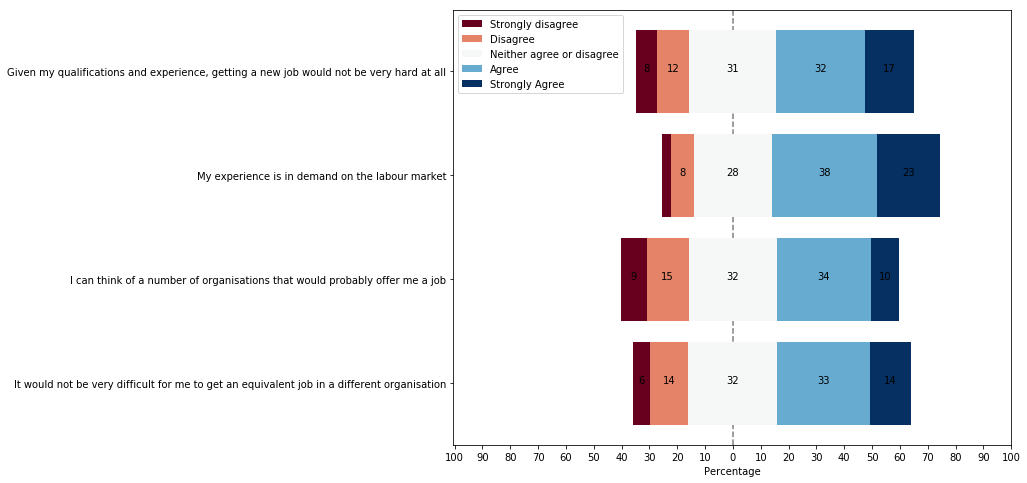

In [225]:
_ = get_plot(v_to_count, "likert")

### I am satisfied with my supervisor/line manager's confidence in me; I am satisfied with a word of thanks from my supervisor/line manager; I am satisfied with the recognition I receive from my supervisor/line manager for doing my job; I am satisfied with the compliments from my supervisor/line manager concerning my work; I am satisfied with the encouragement from my supervisor/line manager while doing my job

In [226]:
v_to_count, filename  = get_count(df, ["likert2[affRec1]. [I am satisfied with my supervisor/line manager's confidence in me]", 'likert2[affRec2]. [I am satisfied with a word of thanks from my supervisor/line manager]', 'likert2[affRec3]. [I am satisfied with the recognition I receive from my supervisor/line manager for doing my job]', 'likert2[affRec4]. [I am satisfied with the compliments from my supervisor/line manager concerning my work]', 'likert2[affRec5]. [I am satisfied with the encouragement from my supervisor/line manager while doing my job]'], "likert", "./../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./2017/de/output/")

In [227]:
display(v_to_count) 

Strongly disagree  \
I am satisfied with my supervisor/line manager'...                  8   
I am satisfied with a word of thanks from my su...                 22   
I am satisfied with the recognition I receive f...                 23   
I am satisfied with the compliments from my sup...                 19   
I am satisfied with the encouragement from my s...                 25   

                                                    Disagree  \
I am satisfied with my supervisor/line manager'...        22   
I am satisfied with a word of thanks from my su...        25   
I am satisfied with the recognition I receive f...        38   
I am satisfied with the compliments from my sup...        27   
I am satisfied with the encouragement from my s...        40   

                                                    Neither agree or disagree  \
I am satisfied with my supervisor/line manager'...                         42   
I am satisfied with a word of thanks from my su...                         71   
I am satisfied with the recognition I receive f...                         58   
I am satisfied with the compliments from my sup...                         67   
I am satisfied with the encouragement from my s...                         64   

                                                    Agree  Strongly Agree  
I am satisfied with my supervisor/line manager'...    105              92  
I am satisfied with a word of thanks from my su...    110              41  
I am satisfied with the recognition I receive f...     98              52  
I am satisfied with the compliments from my sup...    102              54  
I am satisfied with the encouragement from my s...     99              41

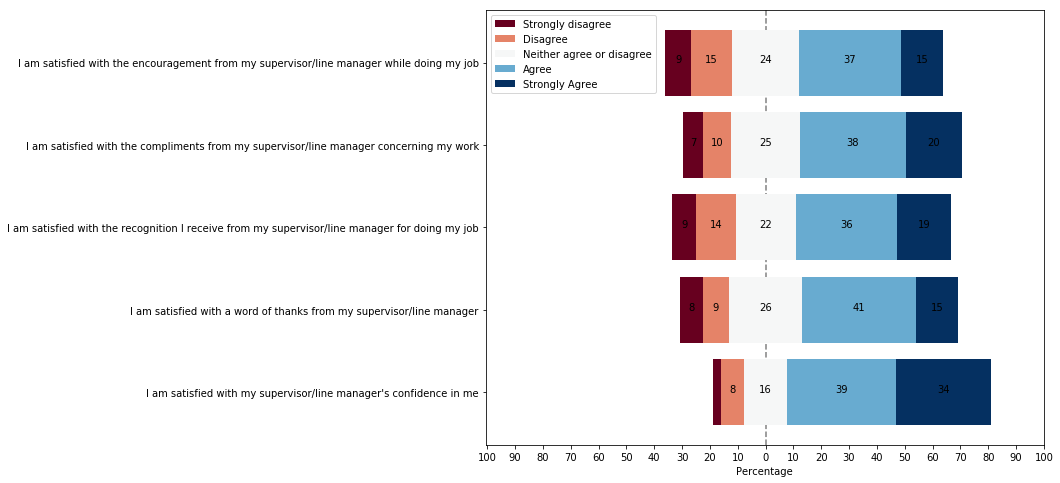

In [228]:
_ = get_plot(v_to_count, "likert")

### I find real enjoyment in my job; Most days I am enthusiastic about my job; I feel fairly well satisfied with my job; I like my job better than the average person

In [229]:
v_to_count, filename  = get_count(df, ['likert2[affSat1]. [I find real enjoyment in my job]', 'likert2[affSat2]. [Most days I am enthusiastic about my job]', 'likert2[affSat3]. [I feel fairly well satisfied with my job]', 'likert2[affSat4]. [I like my job better than the average person]'], "likert", "./../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./2017/de/output/")

In [230]:
display(v_to_count) 

Strongly disagree  Disagree  \
I find real enjoyment in my job                               7        19   
Most days I am enthusiastic about my job                      9        30   
I feel fairly well satisfied with my job                      6        33   
I like my job better than the average person                  6        14   

                                              Neither agree or disagree  \
I find real enjoyment in my job                                      52   
Most days I am enthusiastic about my job                             71   
I feel fairly well satisfied with my job                             48   
I like my job better than the average person                         64   

                                              Agree  Strongly Agree  
I find real enjoyment in my job                 133              58  
Most days I am enthusiastic about my job        120              39  
I feel fairly well satisfied with my job        135              47  
I like my job better than the average person    121              64

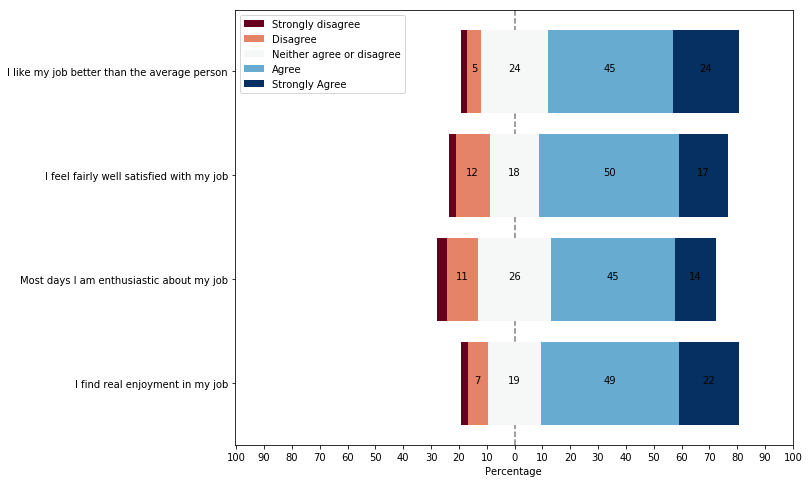

In [231]:
_ = get_plot(v_to_count, "likert")

### It is likely that I will gain a promotion within my current group; The process I have to complete to gain a promotion is clear and understandable; There are many opportunities within my chosen career plan; My current position is an integral part of my career plan; It is likely that my next position will be an RSE role

In [232]:
v_to_count, filename  = get_count(df, ['likert2[progRSE1]. [It is likely that I will gain a promotion within my current group]', 'likert2[progRSE2]. [The process I have to complete to gain a promotion is clear and understandable]', 'likert2[progRSE3]. [There are many opportunities within my chosen career plan]', 'likert2[progRSE4]. [My current position is an integral part of my career plan]', 'likert2[progRSE5]. [It is likely that my next position will be an RSE role]'], "likert", "./../survey_creation/2017/de/listAnswers/likert_agree.csv", "False", "./2017/de/output/")

In [233]:
display(v_to_count) 

Strongly disagree  \
It is likely that I will gain a promotion withi...                 97   
The process I have to complete to gain a promot...                 81   
There are many opportunities within my chosen c...                 46   
My current position is an integral part of my c...                 13   
It is likely that my next position will be an R...                 35   

                                                    Disagree  \
It is likely that I will gain a promotion withi...        68   
The process I have to complete to gain a promot...        57   
There are many opportunities within my chosen c...        65   
My current position is an integral part of my c...        40   
It is likely that my next position will be an R...        34   

                                                    Neither agree or disagree  \
It is likely that I will gain a promotion withi...                         75   
The process I have to complete to gain a promot...                         69   
There are many opportunities within my chosen c...                         64   
My current position is an integral part of my c...                         77   
It is likely that my next position will be an R...                        117   

                                                    Agree  Strongly Agree  
It is likely that I will gain a promotion withi...     18              11  
The process I have to complete to gain a promot...     39              23  
There are many opportunities within my chosen c...     69              25  
My current position is an integral part of my c...     81              58  
It is likely that my next position will be an R...     67              16

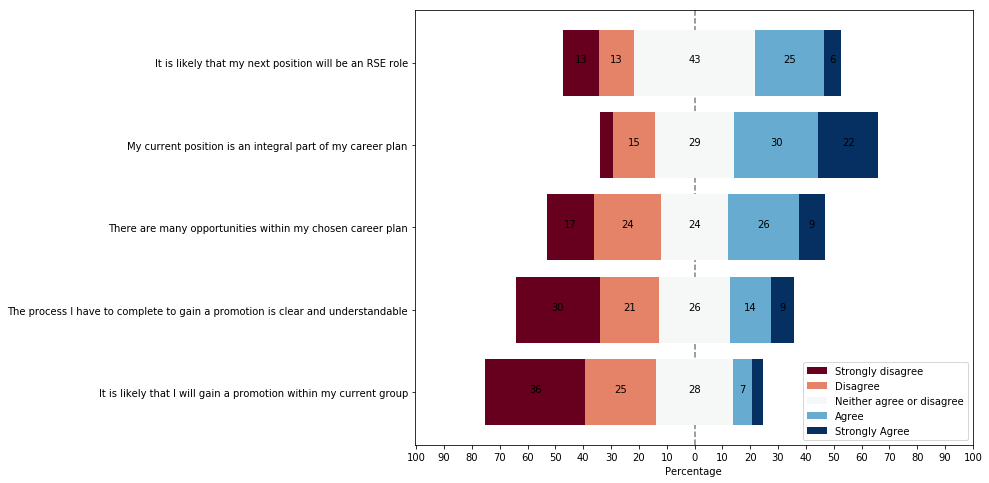

In [234]:
_ = get_plot(v_to_count, "likert")

# Research Software Engineer

This last section regroups different questions about RSEs in general, the specific skills for them, where they meet other RSEs and the prospect of a conference in Germany. We asked them *how* they acquired the skills to become an RSE but also *which* skills they would like to acquire to become a better RSE. The propositions are listed and a wordcloud is proposed to see which are the most frequent words.

The term Research Software Engineer may not have a consensus everywhere. This is why in this survey asked the participants if they could think of another job title. When all the none answer, and the answers saying 'No', were filtered, it remained only 22 propositions that are detailed below. 
The last section was about the RSE network, specific to Germany. It appears that the network is not really efficient yet. First, to the question where they meet other RSE, only 29% of them chose between the different proposition, with a higher number in local RSE group (15%). Added to that, we asked if they were member of the [de-RSE initiative](http://www.de-rse.org/) but only 19% of them where. 
However, to the question to participate to a conference about software development in Germany, 78% of them answered 'Yes'. 

## Skills

### How did you learn the skills you need to become an RSE?

In [235]:
data = df['ukrse3. How did you learn the skills you need to become an RSE?'].dropna()
skills = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
print('There is {} propositions'.format(len(skills)))
for i in skills:
    print(i)

There is 360 propositions
Studium und Jobs als studentische Hilfskraft
in Wirtschaft und Wissenschaft
Learning by doing
Learning by Doing
Mathe Vordiplom + Learning by doing
Selbststudium
Fernuni
Workshops
Uni und autodidaktisch
Selbststudium (Bücher
Tutorials
StackOverflow
Learning-by-doing)
2-wö. Volkshochschulkurs Java
Selbststudium
Workshops
Bücher und vereinzelt Vorlesungen
Ausbildung
Praxiserfahrung aus der Industrie
autodidaktisch
Studium
Autodidaktisch
Online Kurse
Fachhochschule
Online courses
Selbststudium
Studium
Praktikum
Selbststudium
Selbststudium mit gelegentlichen Erklärungen von Kollegen
Learning by doing
Studium
On-the-job-training (z.B. Onlineschulungen: Datacamp)
Autodidakt
während des Studiums selbst erlernt
Studium
Selbststudium
Autodidakt
Promotion
Autodidakt
selbst erlernt
autodidaktisch
selbststudium
Studium
Learning by Doing
Vorlesungen
learning by doing
Weiterbildungen
Studium
Bücher
Internetliteratur
learning by doing
trial and error
erst Hobby
später Studiu

(-0.5, 1499.5, 799.5, -0.5)

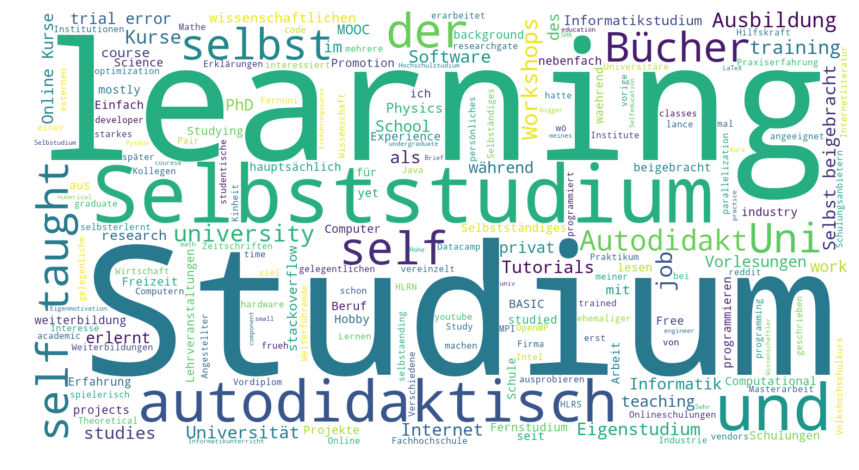

In [236]:
wc = wordcloud(df, ['ukrse3. How did you learn the skills you need to become an RSE?'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.

In [237]:
data = df['skill2. What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.'].dropna()
skills = [z.strip()  for i in data for z in i.split(',') if len(z.strip()) > 2]
print('There is {} propositions'.format(len(skills)))
for i in skills:
    print(i)

There is 292 propositions
Softwarequalitaet
Continuous Integration
Anerkennung als Publikation
Kommunikation der eigenen Arbeit
Gestaltung eines nachhaltig selbsttragenden Softwareprojekts in der Wissenschaft (Community building
Finanzierung
Förderung
etc.); Organisation und Koordination von Softwareprojekten über einzelne Organisationen/Universitäten hinaus (zur Vermeidung von doppelter Arbeit/NIH Syndrom); Kommunikation des Wertes (Semi-)Professioneller Softwareentwicklung in der Wissenschaft (und des Wertes von spezialisierten RSEs im Vergleich zu externen
fachfremden Dienstleistern)
Objektorientiertes Programmieren
Software Design Patterns
Erweiterung der Software Engineering Skills
Software Carpentry Instructor
Rhetorik
Cross-Platform-Development
Mediation
Networking
Studien/Umfragen gezielt entwerfen
IT Security
automatische Tests
Machine Learning
Neuronale Netzwerke
Unit Testing
Cleaner coding
Ständige Weiterlernen auf DataCamp (R
Python)
Reverse engineering
Standardisierung
nac

(-0.5, 1499.5, 799.5, -0.5)

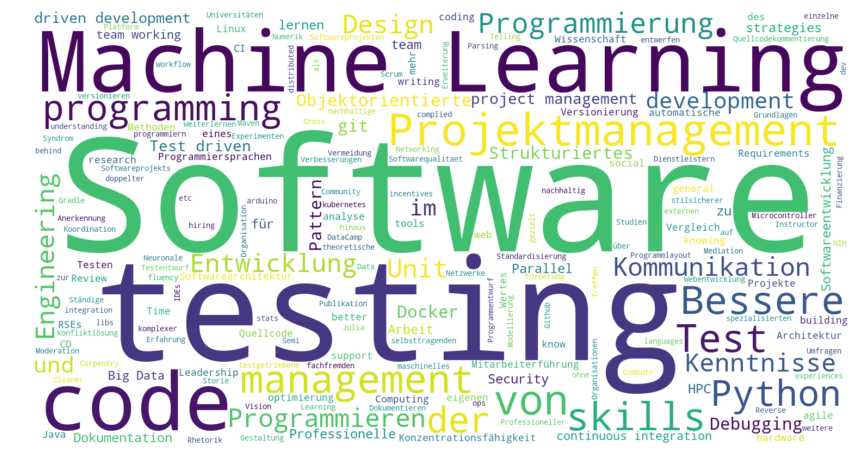

In [238]:
wc = wordcloud(df, ['skill2. What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Do you know a better job title/role than RSE which summarizes all kinds of activities realated to academic software creation?

In [239]:
different_titles = [i for i in df['ukrse11de. Do you know a better job title/role than RSE which summarizes all kinds of activities realated to academic software creation?'].dropna() if i.lower() not in ['nein', 'ni', 'no', '-'] ]
print('There is {} propositions'.format(len(different_titles)))
for i in different_titles:
    print(i)

There is 22 propositions
Software Developing Researcher
Nein! RSE ist und sollte internationaler Standard sein, insb. für Vergleichbarkeit, da er umfassend genug ist, alle unter den vom UKRSE geprägten Begriff fallenden Rollen zu erfassen. Sonderwege wären nicht hilfreich.
what is RSE? I am a biologist writing code.
Systems Engineer
RAD - Research Application Developer
Scientific Software Engineer
Researcher. 
Data Scientist
Computational Researcher
Research Software Developer
Scientific Coder
Numerical Scientist, Computational Scientist
Softwareentwickler
just Software Engineer. leave out the "research", it's not that special compared to industry software
wissenschaftlicher Entwickler
Scientist. Computer Scientist, if you must qualify.
academic software developer
Scientific Software Engineer
Techniker
Software Developer, the academic bits are overrated in the RSE role
I think catagorizing anyone who develops software as an RSE is perhaps to broad.  Many people create software as part 

(0.0, 1.0, 0.0, 1.0)

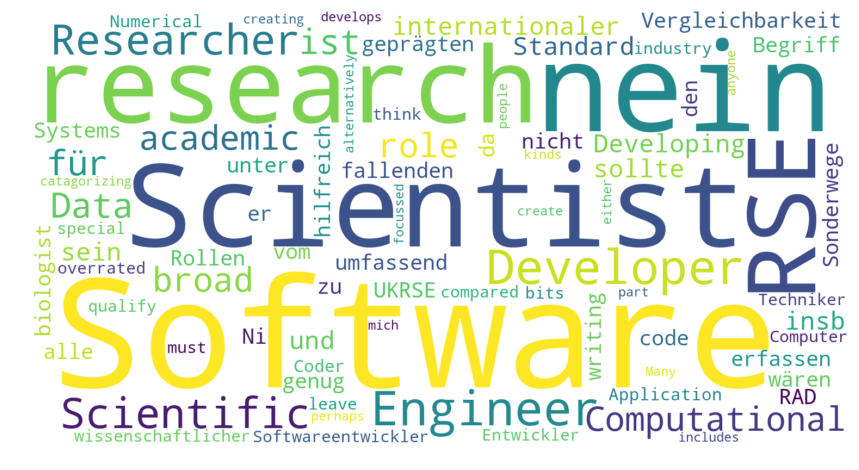

In [240]:
wc = wordcloud(df, ['ukrse11de. Do you know a better job title/role than RSE which summarizes all kinds of activities realated to academic software creation?']) 
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')


## RSE Network

### How do you meet other RSEs?

In [241]:
v_to_count, filename  = get_count(df, ['ukrse2[1]. How do you meet other RSEs? [UK RSE Association (http://rse.ac.uk/)]', 'ukrse2[2]. How do you meet other RSEs? [DE-RSE Community (http://de-rse.org)]', 'ukrse2[3]. How do you meet other RSEs? [Local RSE group/network]', 'ukrse2[4]. How do you meet other RSEs? [N/A]'], "multiple choices", "./../survey_creation/2017/de/listAnswers/ukrse_de.csv", "False", "./2017/de/output/")

In [242]:
perc_to_count = get_percentage(v_to_count, filename)

In [243]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                         
N/A                                       145        71.0
Local RSE group/network                    30        15.0
DE-RSE Community (http://de-rse.org)       20        10.0
UK RSE Association (http://rse.ac.uk/)      9         4.0

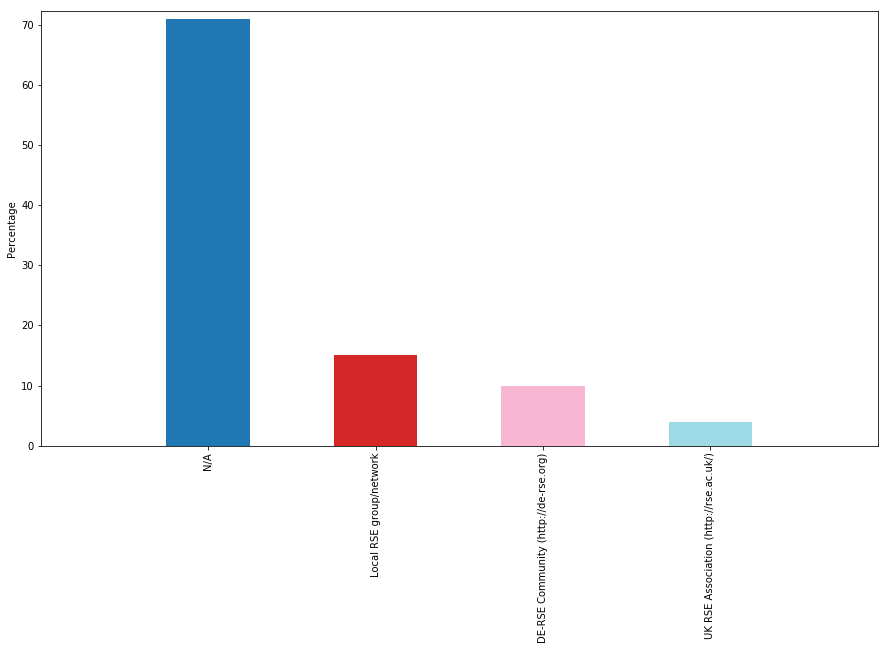

In [244]:
_ = get_plot(perc_to_count, "multiple choices")

### Are you a member of the de-RSE initiative? (Members are people who have signed up to the de-RSE mailing list, http://www.de-rse.org/en/join.html)

In [245]:
v_to_count, filename  = get_count(df, ['ukrse10de. Are you a member of the de-RSE initiative? (Members are people who have signed up to the de-RSE mailing list, http://www.de-rse.org/en/join.html)'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [246]:
perc_to_count = get_percentage(v_to_count, filename)

In [247]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Are you a member of the de-RSE initiative? (Mem...           43         186   

                                                    NaN value  \
Are you a member of the de-RSE initiative? (Mem...         96   

                                                    Yes [Percentage]  \
Are you a member of the de-RSE initiative? (Mem...              19.0   

                                                    No [Percentage]  
Are you a member of the de-RSE initiative? (Mem...             81.0

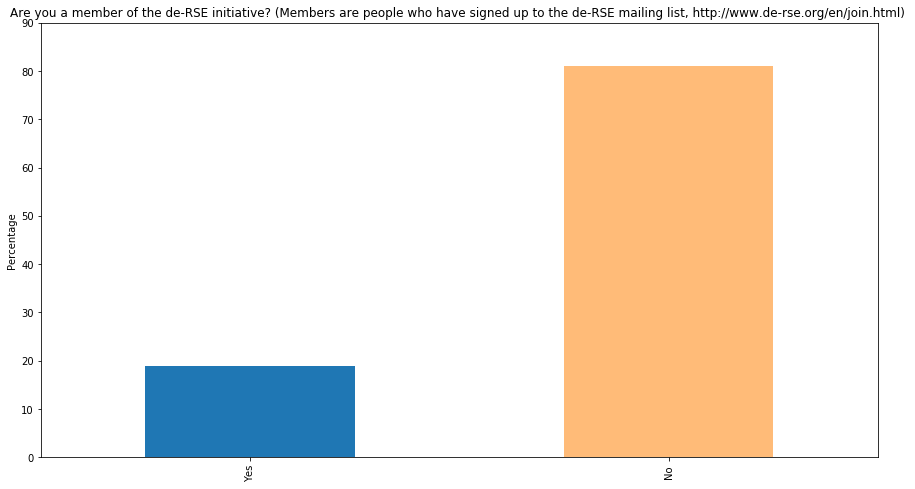

In [248]:
_ = get_plot(perc_to_count, "y/n/na")

### Would you like to visit a conference about software development in academia in Germany?; We may contact you for a possible conference announcement via email. If you allow then please add your email address here: https://goo.gl/WizV7d

In [249]:
v_to_count, filename  = get_count(df, ['ukrse12de. Would you like to visit a conference about software development in academia in Germany?', 'ukrse13de. We may contact you for a possible conference announcement via email. If you allow then please add your email address here: https://goo.gl/WizV7d'], "y/n/na", "./../survey_creation/2017/de/listAnswers/.csv", "False", "./2017/de/output/")

In [250]:
perc_to_count = get_percentage(v_to_count, filename)

In [251]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
ukrse12de. Would you like to visit a conference...          153          44   
ukrse13de. We may contact you for a possible co...           99           6   

                                                    NaN value  \
ukrse12de. Would you like to visit a conference...        128   
ukrse13de. We may contact you for a possible co...        220   

                                                    Yes [Percentage]  \
ukrse12de. Would you like to visit a conference...              78.0   
ukrse13de. We may contact you for a possible co...              94.0   

                                                    No [Percentage]  
ukrse12de. Would you like to visit a conference...             22.0  
ukrse13de. We may contact you for a possible co...              6.0

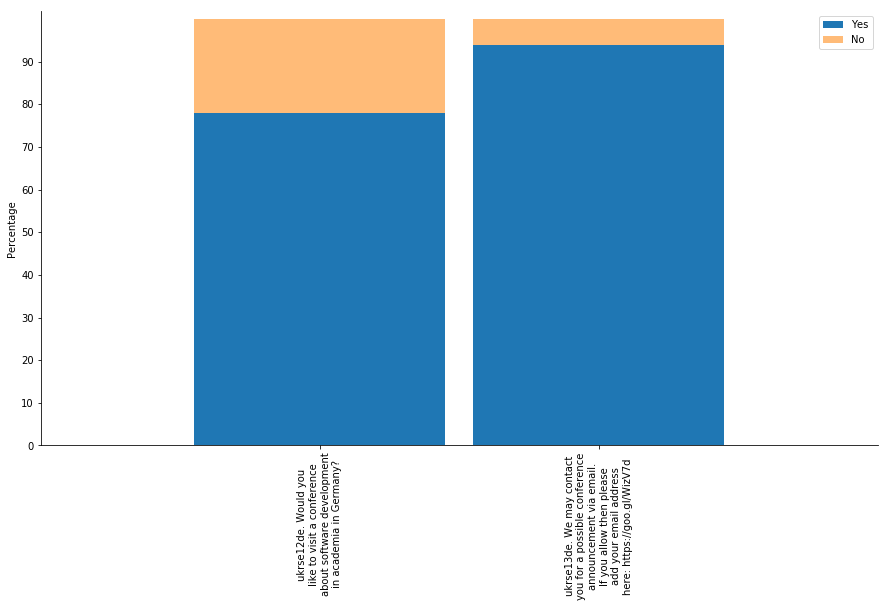

In [252]:
_ = get_plot(perc_to_count, "y/n/na")